## <a id="step1">Шаг 1. Импорт файлов, подготовка к анализу </a>

In [1]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Таблица `visits`###


In [2]:
visits = pd.read_csv('C:\\Users\\Alfa\\Downloads\\visits_log.csv')

visits.info()
display(visits.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Данные о посещении сайта Яндекс.Афиша загружены. Пропусков в данных не имеется. Типы данных в столбцах `End Ts` и `Start Ts` необходимо поменять на `datetime` для последующего анализа данных.
Сразу можно заметить, что названия колонок не совсем удобны для последующей работы. В первую очередь приведем все названия к нижнему регистру и уберем пробелы.

In [3]:
visits = visits.rename(columns={
    'Device': 'device', 
    'End Ts': 'end_ts', 
    'Source Id': 'source_id', 
    'Start Ts': 'start_ts', 
    'Uid': 'uid'})

С помощью метода `to_datetime` приведем тип данных в стролбцах `end_ts` и  `start_ts` к `datetime`:

In [4]:
visits.end_ts = pd.to_datetime(visits.end_ts)
visits.start_ts = pd.to_datetime(visits.start_ts)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Мы имеем дело с логами сервера, поэтому дубликаты в каждом и столбцов может быть, даже в `uid`, так как пользователь может заходить не один раз. Проверим таблицу на наличие полных дубликатов.

In [5]:
print(visits.duplicated().sum())

0


Проверка на нарушение временной логике в данных с началом и окончанием сессии

In [6]:
display(visits[visits['end_ts'] <= visits['start_ts']].head())
print('Доля данных с нулевой или отрицательной продолжительностью сессии составляет: ', end='')
print(round((len(visits[visits['end_ts'] <= visits['start_ts']])/ len(visits) * 100), 2), '%')

,device,end_ts,source_id,start_ts,uid
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332


Доля данных с нулевой или отрицательной продолжительностью сессии составляет: 9.96 %


Таких данных много, но такие данные нам не нужны, так как скорее всего, тут какая-то техническая ошибка. Удалим эти данные.


In [7]:
visits = visits[visits['start_ts'] < visits['end_ts']]

Рассмотрим статистическое описание каждого столбца в таблице `visits`.

In [8]:
display(visits.describe(include='all'))

,device,end_ts,source_id,start_ts,uid
count,323604,323604,323604.000000,323604,3.236040e+05
unique,2,210174,NaN,209770,NaN
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN
freq,238876,22,NaN,19,NaN
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00,NaN
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00,NaN
mean,NaN,NaN,3.732383,NaN,9.200880e+18
std,NaN,NaN,1.924782,NaN,5.295512e+18
min,NaN,NaN,1.000000,NaN,1.186350e+13
25%,NaN,NaN,3.000000,NaN,4.614964e+18


На сайт Яндекс.Афиша с июня 2017 по май 2018 года заходили чаще всего с компьютера - видимо, так удобнее выбирать билеты, сразу читая описание, просматривая посадку в зале и так далее.

24.11.2017 года - самый популярный день для посещения сайта Яндекс.Афиша. Видимо, эта пятница была особенно свободна от дел для покупки билетов.

В колонке `source_id` расположены идентификаторы источников привлечения покупателей, 10 - максимальное число для индентификации, 1 - минимальное. Сами названия нам будут неизвестны.

Изменим типы данных для оптимизации памяти:

In [9]:
visits['source_id'] = visits['source_id'].astype('int8')
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 5 columns):
device       323604 non-null object
end_ts       323604 non-null datetime64[ns]
source_id    323604 non-null int8
start_ts     323604 non-null datetime64[ns]
uid          323604 non-null uint64
dtypes: datetime64[ns](2), int8(1), object(1), uint64(1)
memory usage: 12.7+ MB


### Таблица `orders`###

In [10]:
orders = pd.read_csv('C:\\Users\\Alfa\\Downloads\\orders_log.csv')

orders.info()
display(orders.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Загружено 50 415 заказов за июнь 2017-май 2018 гг с Яндекс.Афиша. Пропусков не имеется. 
Необходимо привести название колонок к нижнему регистру для удобства дальнейшего анализа и поменять тип данных в колонке `Buy Ts` к `datetime`.

In [11]:
orders = orders.rename(columns={
    'Buy Ts': 'buy_ts', 
    'Revenue': 'revenue', 
    'Uid': 'uid'})

In [12]:
orders.buy_ts = pd.to_datetime(orders.buy_ts)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


По аналогии с данными о посещении, в каждой из колонок могут быть повторы даты, суммы прибыли и даже идентификатора пользователя, это возможно при наличии нескольких заказов у одного пользователя/заказов с одинаковой суммой стоимости/несколько заказов в один день. Ищем полный дубликаты.

In [13]:
print(orders.duplicated().sum())

0


Рассмотрим статистическое описанией всех столбцов.

In [14]:
display(orders.describe(include='all'))

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
first,2017-06-01 00:10:00,NaN,NaN
last,2018-06-01 00:02:00,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18


Здесь присутствуют данные с 01.06.2017 по 01.06.2018 года, то есть на 1 день больше, чем за 1 год. Судя по времени совершения покупки, это 2 минуты первого. Скорее всего, сессия данного пользователя началась 31.05.2018 г., а окончательное оформление покупки было уже в полночь. Однако эта покупка может исказить отчеты по месячным продажам. Необходимо исключить данную покупку из анализа, так как одна запись - это менее 1 % всех данных в этой таблице.

Выручка Яндекс.Афишы с каждого из заказов разнится - от 0 у.е. до 2633. Стандартное отклонение намного выше среднего, среднее выше, чем медиана, что говорит о наличии редко встречаюющихся высоких значениях, ведь 75% заказов с выручкой до 5 у.е.

In [15]:
orders = orders[orders['buy_ts'] < '2018-06-01']
display(orders.describe(include='all'))

,buy_ts,revenue,uid
count,50414,50414.000000,5.041400e+04
unique,45990,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
first,2017-06-01 00:10:00,NaN,NaN
last,2018-05-31 23:56:00,NaN,NaN
mean,NaN,4.999678,9.098339e+18
std,NaN,21.818574,5.285642e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.534221e+18


Изменим типы данных для оптимизации памяти:

In [16]:
orders['revenue'] = orders['revenue'].astype('float32')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
buy_ts     50414 non-null datetime64[ns]
revenue    50414 non-null float32
uid        50414 non-null uint64
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 1.3 MB


### Таблица `costs` ###  

In [17]:
costs = pd.read_csv('C:\\Users\\Alfa\\Downloads\\costs.csv')

costs.info()
display(costs.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


В таблице с данными о рекламных расходах с названиями столбцов все в порядке, приведем столбец с данными `dt` к `datetime` для дальнейшей работы со столбцом.

In [18]:
costs.dt = pd.to_datetime(costs.dt)

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


В этой таблице также посмотрим на наличие полных дубликатов:

In [19]:
print(costs.duplicated().sum())

0


Полных дубликатов не имеется, рассмотрим статистическое описание всех столбцов.

In [20]:
display(costs.describe(include='all'))

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2018-03-03 00:00:00,NaN
freq,NaN,7,NaN
first,NaN,2017-06-01 00:00:00,NaN
last,NaN,2018-05-31 00:00:00,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000


Изменим типы данных для оптимизации памяти:

In [21]:
costs['source_id'] = costs['source_id'].astype('int8')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int8
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int8(1)
memory usage: 42.3 KB


10 источников прихода всех пользователей. 

Стандартное отклонение в затратах на источник в дату выше, чем среднее, затраты распределны неравномерно. На какой -то источник тратят больше.

## <a id="step2">Шаг 2. Отчеты, подсчет метрик </a>

### <a id="step2.1">Яндекс.Афиша. Посещения сайта </a>



#### Сколько людей пользуются сервисом в день, неделю, месяц?

Для того, чтобы ответить на данный вопрос, необходимо выделить из даты начала сессии день, неделю, месяц и год для последующих вычислений.

In [22]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_year'] = visits['start_ts'].dt.year

visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018


              uid
session_date     
2017-06-01    547
2017-06-02    549
2017-06-03    400
2017-06-04    416
2017-06-05    738
               uid
count   364.000000
mean    817.582418
std     338.577980
min       1.000000
25%     532.750000
50%     829.000000
75%    1055.250000
max    3090.000000


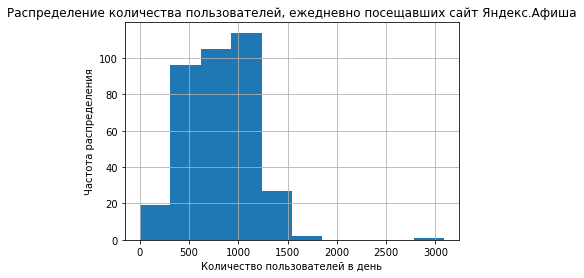

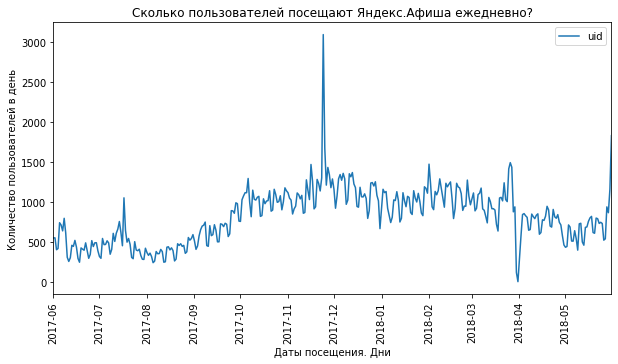

В среднем на сайт Яндекс.Афиша заходят около 817 пользователей в день


In [23]:
# Расчет числа уникальных пользователей, посетивших сайт в день
dau= visits.groupby('session_date').agg({'uid': 'nunique'})
print(dau.head())
print(dau.describe())

dau.hist()
plt.title('Распределение количества пользователей, ежедневно посещавших сайт Яндекс.Афиша')
plt.xlabel('Количество пользователей в день')
plt.ylabel('Частота распределения')
plt.show()
dau.plot(figsize=(10,5), rot=90)
plt.title('Сколько пользователей посещают Яндекс.Афиша ежедневно?')
plt.xlabel('Даты посещения. Дни')
plt.ylabel('Количество пользователей в день')
plt.show()
print(f'В среднем на сайт Яндекс.Афиша заходят около {int(dau.mean())} пользователей в день')


Распределение посещений пользователей по дням приблизительно равномерно, также есть выброс в 3319 пользователя, посетивших сайт Яyдекс.Афиша. Скорее всего, это был день, когда сработал механизм привлечения пользователей (реклама, акция), но он не привел к самому прибыльному дню для сервиса, так как популярные дни в Визитах и Продажах не совпадают. Вполне возможно, что причина высокого интереса к Яндекс.Афише 24 ноября - та самая Черная Пятница.

Распределение количества пользователей в день нормально, это видно по гистограмме и по статистическому описанию. В среднем на Яндекс.Афиша заходят около 900 пользователей.

               uid
session_week      
2017-06-01    3665
2017-06-08    2963
2017-06-15    2530
2017-06-22    2756
2017-06-29    2727
2017-07-06    3175
2017-07-13    4316
2017-07-20    2682
2017-07-27    2239
2017-08-03    2105
               uid
count    53.000000
mean   5155.528302
std    1907.515194
min    1826.000000
25%    3605.000000
50%    5282.000000
75%    6693.000000
max    9800.000000


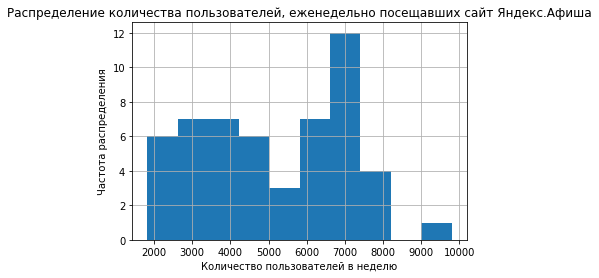

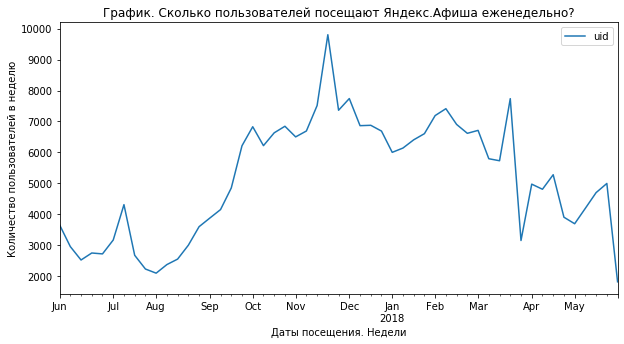

В среднем на сайт Яндекс.Афиша заходят около 5155 пользователей в неделю


In [24]:
# Расчет числа уникальных пользователей, посетивших сайт в неделю
wau= visits.groupby('session_week').agg({'uid': 'nunique'})
print(wau.head(10))
print(wau.describe())


wau.hist()
plt.title('Распределение количества пользователей, еженедельно посещавших сайт Яндекс.Афиша')
plt.xlabel('Количество пользователей в неделю')
plt.ylabel('Частота распределения')
plt.show()
wau.plot(figsize=(10,5))
plt.title('График. Сколько пользователей посещают Яндекс.Афиша еженедельно?')
plt.xlabel('Даты посещения. Недели')
plt.ylabel('Количество пользователей в неделю')
plt.show()


print(f'В среднем на сайт Яндекс.Афиша заходят около {int(wau.mean())} пользователей в неделю')

Можно заметить, что к концу года всё больше людей заходят на сайт, но все меньше и меньше весной-летом. Вероятно, связанно с сезонностью - многие театры закрываются на летний период, другие развлечения, находящиеся под крышей, становятся менее актуальными, так как многие берут отпуска и уезжают загород, за границу.

Также можно заметить, что на 47 неделе 2017 года - всплеск пользователей - ведь это неделя, где пятницей была Черная пятница.

,uid
session_month,
2017-06-01,11885
2017-07-01,12725
2017-08-01,10465
2017-09-01,17117
2017-10-01,26794
2017-11-01,29745
2017-12-01,28593
2018-01-01,25930
2018-02-01,25955


                uid
count     12.000000
mean   20955.666667
std     6874.326378
min    10465.000000
25%    16019.000000
50%    21846.500000
75%    26164.750000
max    29745.000000


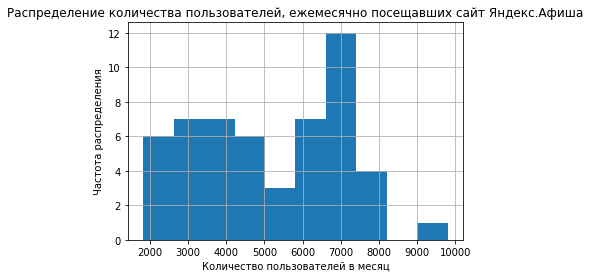

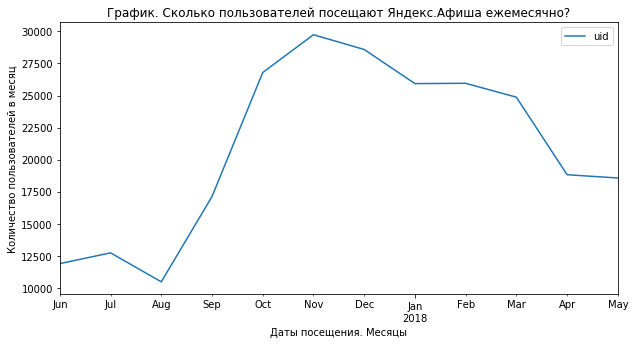

В среднем на сайт Яндекс.Афиша заходят около 20955 пользователей в месяц


In [25]:
# Расчет числа уникальных пользователей, ежемесячно посещающих сайт
mau= visits.groupby('session_month').agg({'uid': 'nunique'})
display(mau)
print(mau.describe())

wau.hist()
plt.title('Распределение количества пользователей, ежемесячно посещавших сайт Яндекс.Афиша')
plt.xlabel('Количество пользователей в месяц')
plt.ylabel('Частота распределения')
mau.plot(figsize=(10,5))
plt.title('График. Сколько пользователей посещают Яндекс.Афиша ежемесячно?')
plt.xlabel('Даты посещения. Месяцы')
plt.ylabel('Количество пользователей в месяц')
plt.show()


print(f'В среднем на сайт Яндекс.Афиша заходят около {int(mau.mean())} пользователей в месяц')

На диаграмме мы можем заметить, что самые посещаемые месяцы - это ноябрь и декабрь. Время, когда мы планируем свои новогодние каникулы, возможно, рассматривая покупку на сайте Яндекс.Афиша как отличный подарок близким на Новый год.

В октябре и в первые три месяца года посещений примерно одинаковы. А вот с апреля визитов все меньше. Лето - не время сидеть в помещениях, люди планируют отпуск, да и некоторые театры закрываются.

Также можно заметить, что в летние месяцы 2017 года посещений было гораздо меньше, чем в мае 2018 года. Скорее всего, проект Яндекс.Афиша был менее популярный. Вполне возможно, что в летние месяцы 2018 года активность будет выше.

#### Сколько людей посещают сайт через разные девайсы?

Также рассчитаем, сколько людей заходит через разные девайсы. Так как по дням информация будет не слишком информативной (выходные, праздники, рабочие дни - могут повлиять очень сильно), то рассмотрим посещения людей через различные девайся по неделям и месяцам.


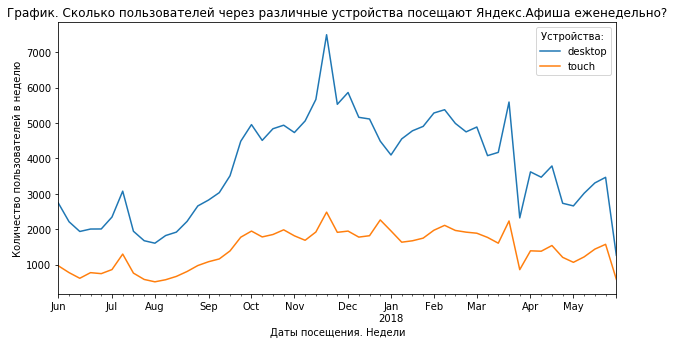

In [26]:
wau_device = visits.pivot_table(
        index='session_week',
        columns='device',
        values = 'uid',
        aggfunc='nunique'
)
wau_device.plot(figsize=(10,5))
plt.title('График. Сколько пользователей через различные устройства посещают Яндекс.Афиша еженедельно?')
plt.xlabel('Даты посещения. Недели')
plt.ylabel('Количество пользователей в неделю')
plt.legend(title='Устройства: ')
plt.show()


Можно заметить, что разрыв между устройствами огромен: на сайт предпочитают заходить через компьютер, нежели через сенсорные устройства (телефоны, планшеты). Причем увеличение активности в осенне-зимней период нам дает именно пользователи, зашедшие через компьютер - у сенсорных устройств пользователи примерно на одном уровне с октября 2017 по март 2018 года. Стоит задуматься - может быть мобильная версия не так хороша? Либо реклама построена так, что эффективно привлекает пользователей именно с компьютеров.

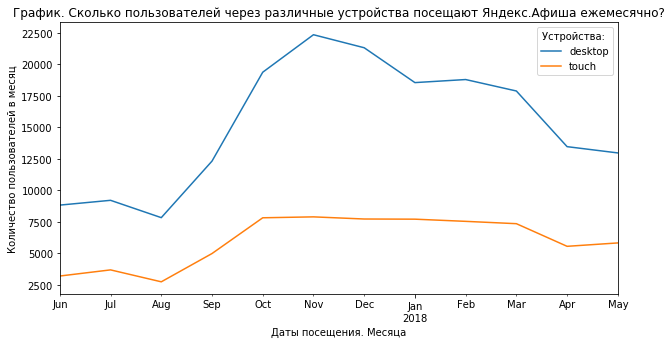

In [27]:
mau_device = visits.pivot_table(
        index='session_month',
        columns='device',
        values = 'uid',
        aggfunc='nunique'
)
mau_device.plot(figsize=(10,5))
plt.title('График. Сколько пользователей через различные устройства посещают Яндекс.Афиша ежемесячно?')
plt.xlabel('Даты посещения. Месяца')
plt.ylabel('Количество пользователей в месяц')
plt.legend(title='Устройства: ')
plt.show()


В анализе по месяцам можно увидеть еще бОльшую разницу в количестве пользователей с различных девайсов, заходивших на сайт ежемесячно. Разрыв огромен, хотя потенциально мобильная версия не должна отставать хотя бы в ноябре (небезызвестная Черная пятница).

#### Сколько сессий в день?

,uid
session_date,
2017-06-01,599
2017-06-02,596
2017-06-03,429
2017-06-04,447
2017-06-05,807
...,...
2018-05-27,582
2018-05-28,1041
2018-05-29,942


               uid
count   364.000000
mean    889.021978
std     383.086457
min       1.000000
25%     575.000000
50%     898.000000
75%    1153.750000
max    3755.000000


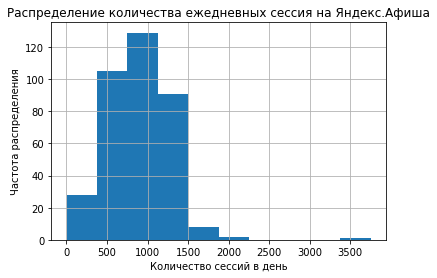

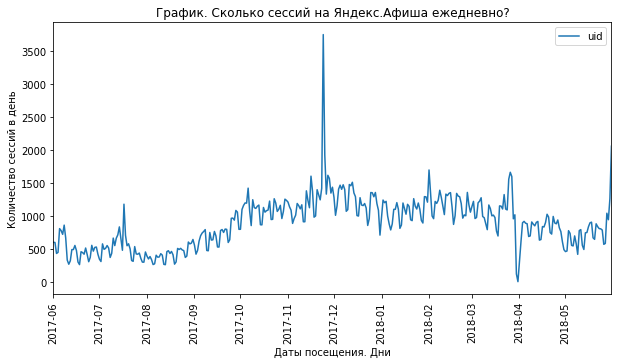

Среднее количество сессий на сервисе Яндекс.Афиша в день: 889
Среднее количество сессий на 1 пользователя сервиса Яндекс.Афиша в день: 1.09


In [28]:
sessions_users_per_day = visits.groupby('session_date').agg({'uid': 'count'})
display(sessions_users_per_day)
print(sessions_users_per_day.describe())

sessions_users_per_day.hist()
plt.title('Распределение количества ежедневных сессия на Яндекс.Афиша')
plt.xlabel('Количество сессий в день')
plt.ylabel('Частота распределения')
plt.show()
sessions_users_per_day.plot(figsize=(10,5), rot=90)
plt.title('График. Сколько сессий на Яндекс.Афиша ежедневно?')
plt.xlabel('Даты посещения. Дни')
plt.ylabel('Количество сессий в день')
plt.show()

print(f'Среднее количество сессий на сервисе Яндекс.Афиша в день: {int(sessions_users_per_day.mean())}')
print(f'Среднее количество сессий на 1 пользователя сервиса Яндекс.Афиша в день: {float(round(sessions_users_per_day.mean()/dau.mean(), 2))}')
                                                              

987 сессий в день в среднем на сайте Яндекс.Афиша. В среднем в день 1 пользователь проводит только 1 сессию на сайте Яндекс.Афиша. Можно заметить, что и графики, и распределение примерно совпадают с количеством пользователей в день.

Также можно узнать количество сессий на 1 пользователя за месяц, что покажет регулярность использования сервиса.

#### Сколько сессий на одного пользователя в месяц?

Далеко не все пользователи заходят в месяц чаще 1го раза. Тем не менее, это может быть обусловлено особенностью самого продукта - не у каждого есть возможность посещать все мероприятия в его города(это дорого), да и желания. 

,n_sessions,n_users,sessions_per_user
session_month,,,
2017-06-01,14774,11885,1.24
2017-07-01,15993,12725,1.26
2017-08-01,12912,10465,1.23
2017-09-01,21492,17117,1.26
2017-10-01,34097,26794,1.27
2017-11-01,39795,29745,1.34
2017-12-01,37908,28593,1.33
2018-01-01,33304,25930,1.28
2018-02-01,33548,25955,1.29


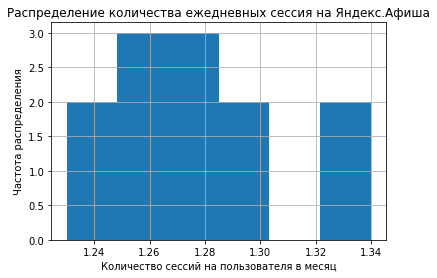

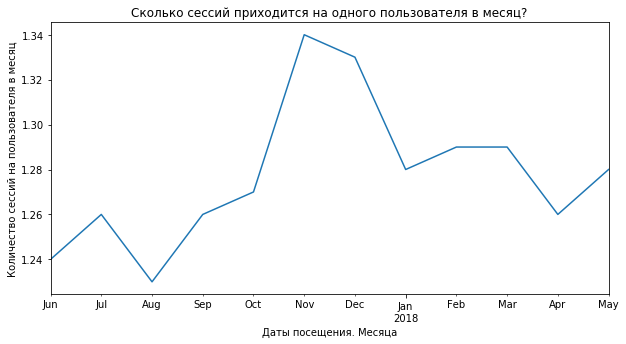

Среднее количество сессий на пользователя в месяц: 1.2774999999999999


In [29]:
sessions_per_user = visits.groupby('session_month').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users']).round(2)
display(sessions_per_user)

sessions_per_user['sessions_per_user'].hist(bins=6)
plt.title('Распределение количества ежедневных сессия на Яндекс.Афиша')
plt.xlabel('Количество сессий на пользователя в месяц')
plt.ylabel('Частота распределения')
plt.show()
sessions_per_user['sessions_per_user'].plot(figsize=(10,5))
plt.title('Сколько сессий приходится на одного пользователя в месяц?')
plt.ylabel('Количество сессий на пользователя в месяц')
plt.xlabel('Даты посещения. Месяца')
plt.show()
print(f'Среднее количество сессий на пользователя в месяц: {sessions_per_user.sessions_per_user.mean()}')

Не сказать, чтобы пользователи заходили регулярно. Большая часть пользователей заходит 1 раз в месяц. Малая часть - чуть чаще.

#### Сколько длится одна сессия?

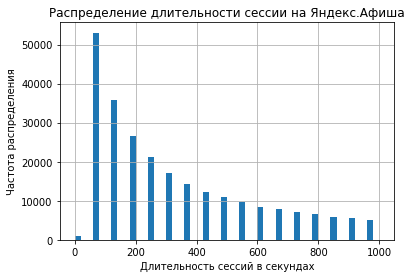

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration_sec, dtype: float64
В среднем одна сессия длится 360 секунд


In [30]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins=50, range=(0,1000))
plt.title('Распределение длительности сессии на Яндекс.Афиша')
plt.xlabel('Длительность сессий в секундах')
plt.ylabel('Частота распределения')
plt.show()
print(visits.session_duration_sec.describe())


print(f'В среднем одна сессия длится {int(visits.session_duration_sec.median())} секунд')

ASL. Согласно статистисескому описанию, среднее смещено в бОльшую сторону из-за выбросов (42660 секунд - это 12 часов на сервисе - точно редкость), целесообразно за типичную продолжительность взять медиану. Пользователь узнает всю необходимую информацию примерно за 6 минут. Если при этом он делает заказ - то проблем нет. Если же нет, нужно обратить на это внимание.

#### Как часто люди возвращаются?

Для того, чтобы рассчитать Retention Rate, необходимо произвести когортный анализ. В целом, оптимально будет за когорты принять пользователей, зашедших впервые на сайт за месяц. 

In [31]:
# Расчет даты первой сессии у каждого из пользователей 
first_visit_date_by_users = visits.groupby('uid')['session_date'].min()
first_visit_date_by_users.name = 'first_visit_date'
visits.info()

# Присоединении данных о дате первой сессии пользователей к таблице visits
visits = visits.join(first_visit_date_by_users, on='uid')
display(visits.head())
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 10 columns):
device                  323604 non-null object
end_ts                  323604 non-null datetime64[ns]
source_id               323604 non-null int8
start_ts                323604 non-null datetime64[ns]
uid                     323604 non-null uint64
session_date            323604 non-null object
session_week            323604 non-null datetime64[ns]
session_month           323604 non-null datetime64[ns]
session_year            323604 non-null int64
session_duration_sec    323604 non-null int64
dtypes: datetime64[ns](4), int64(2), int8(1), object(2), uint64(1)
memory usage: 35.0+ MB


,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018,1680,2018-02-19
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018,1440,2018-03-09
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017,60,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018,3360,2017-06-29


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 11 columns):
device                  323604 non-null object
end_ts                  323604 non-null datetime64[ns]
source_id               323604 non-null int8
start_ts                323604 non-null datetime64[ns]
uid                     323604 non-null uint64
session_date            323604 non-null object
session_week            323604 non-null datetime64[ns]
session_month           323604 non-null datetime64[ns]
session_year            323604 non-null int64
session_duration_sec    323604 non-null int64
first_visit_date        323604 non-null object
dtypes: datetime64[ns](4), int64(2), int8(1), object(3), uint64(1)
memory usage: 37.5+ MB


In [32]:
#Выделение когорты и жизненных циклов каждой из когорт
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['session_date'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['visit_month'] - visits['first_visit_month'])/ np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round()
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')

# Создание таблицы с данным о когортах и числу пользователей в каждом возрасте когорты
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts.head())


,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,11885
1,2017-06-01,1,900
2,2017-06-01,2,606
3,2017-06-01,3,710
4,2017-06-01,4,777


In [33]:
# Нахождение первоначального числа пользователей в когорте
initial_number_of_users = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month', 'uid']]
initial_number_of_users.columns = ['first_visit_month', 'cohort_users']
display(initial_number_of_users)

# Дополнение таблицы информации о числе пользователей в когорте (всего)
cohorts = cohorts.merge(initial_number_of_users, on='first_visit_month')
display(cohorts)

,first_visit_month,cohort_users
0,2017-06-01,11885
12,2017-07-01,11825
23,2017-08-01,9214
33,2017-09-01,15125
42,2017-10-01,23538
50,2017-11-01,24852
57,2017-12-01,23030
63,2018-01-01,20573
68,2018-02-01,20173
72,2018-03-01,18793


,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,11885,11885
1,2017-06-01,1,900,11885
2,2017-06-01,2,606,11885
3,2017-06-01,3,710,11885
4,2017-06-01,4,777,11885
...,...,...,...,...
73,2018-03-01,1,766,18793
74,2018-03-01,2,480,18793
75,2018-04-01,0,14215,14215
76,2018-04-01,1,675,14215


Text(93.49999999999999, 0.5, 'Месяц возникновения когорты')

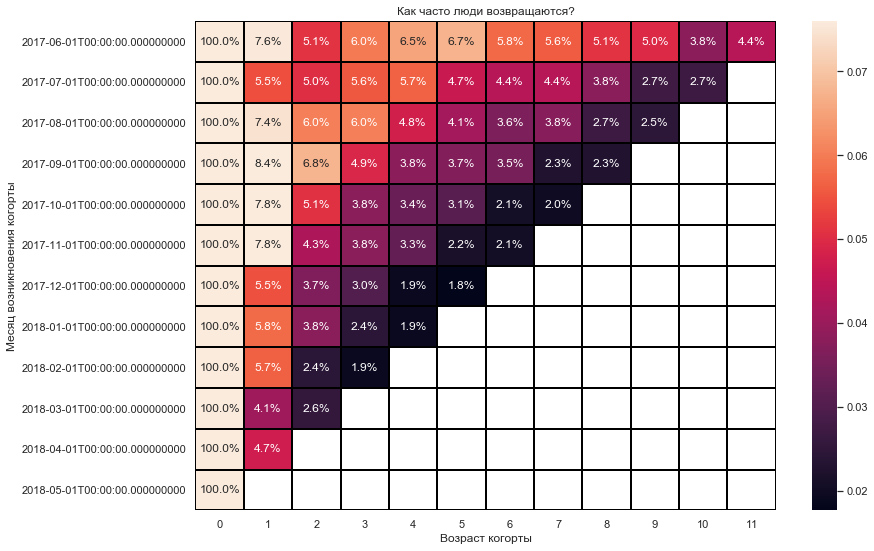

In [34]:
# Расчет Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_visit_month', columns = 'cohort_lifetime', values='retention', aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Как часто люди возвращаются?')
sns.heatmap(retention_pivot, annot=True,fmt='.1%', linewidths=1, linecolor='black', vmax=.076)
plt.xlabel('Возраст когорты')
plt.ylabel('Месяц возникновения когорты')

Практически большинство когорт показывает снижения уровня удержания посетителей во всех месяцах, кроме июньской и июльской когорт, в которых присутствует небольшое повышение уровня на 3ем месяце существования когорт - сентябрь-октябрь.

Постепенно все когорты показывают снижение к апрелю до 2-3 %, кроме мартовской и апрельской когорт - они показывают чуть больше. Чувствуется, что сезонность - очень сильный фактор.


### Яндекс.Афиша. Посещения. Выводы: ### 

В среднем, пользователи проводят на сайте Яндекс.Афиша 360 секунд, при этом обычно посещая сервис 1 раз в месяц.

Ярко выраженность сезонность спроса пользователей: в весенне-летний период обычно идет спад активности (особенно в августе, в бархатном сезоне отпусков и каникул), возрастает к осени, а в ноябре-декабре достигает пика (Черная пятница и Новый год).

Практически большинство когорт показывает снижения уровня удержания посетителей во всех месяцах, кроме июньской и июльской когорт, в которых присутствует небольшое повышение уровня на 3ем месяце существования когорт - сентябрь-октябрь. При этом ближе к апрелю REtention Rate почти во всех когортах падает до 2-3 %.

Анализ посещаемости пользователей с помощью различных типов устройств показал, что пользователи, зашедшие через компьютер, показывали бОльшую активность, в их спросе ярко выражена сезонность. При этом показатель количества пользователей с устройств `touch` практически не меняется из периода в период. Либо не работают рекламные кампании, либо проблема с удобством использования мобильной версии сайта.


### <a id="step2.2">Яндекс.Афиша. Продажи </a>



#### Когда люди начинают покупать?

Для ответа на данный вопрос необходимо добавить информацию о заказах пользователей из таблицы `orders` в таблицу `visits`.

In [35]:
# Формируем таблицу с первым заказов клиентов
first_orders_by_users = orders.groupby('uid')['buy_ts'].min()
first_orders_by_users.name = 'first_buy_date'

display(first_orders_by_users.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_buy_date, dtype: datetime64[ns]

In [36]:
visits.info()
# Добавление данных о дате первого заказа клиента в таблицу visits, если он был произведен
visits = visits.merge(first_orders_by_users, how='left', left_on='uid', right_on='uid')
display(visits.head())
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 359399
Data columns (total 14 columns):
device                  323604 non-null object
end_ts                  323604 non-null datetime64[ns]
source_id               323604 non-null int8
start_ts                323604 non-null datetime64[ns]
uid                     323604 non-null uint64
session_date            323604 non-null object
session_week            323604 non-null datetime64[ns]
session_month           323604 non-null datetime64[ns]
session_year            323604 non-null int64
session_duration_sec    323604 non-null int64
first_visit_date        323604 non-null object
first_visit_month       323604 non-null datetime64[ns]
visit_month             323604 non-null datetime64[ns]
cohort_lifetime         323604 non-null int32
dtypes: datetime64[ns](6), int32(1), int64(2), int8(1), object(3), uint64(1)
memory usage: 43.6+ MB


,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_buy_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017,1080,2017-12-20,2017-12-01,2017-12-01,0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018,1680,2018-02-19,2018-02-01,2018-02-01,0,NaT
2,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018,1440,2018-03-09,2018-03-01,2018-05-01,2,2018-03-09 20:25:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017,60,2017-09-03,2017-09-01,2017-09-01,0,2017-09-04 12:46:00
4,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018,3360,2017-06-29,2017-06-01,2018-01-01,7,NaT


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323604 entries, 0 to 323603
Data columns (total 15 columns):
device                  323604 non-null object
end_ts                  323604 non-null datetime64[ns]
source_id               323604 non-null int8
start_ts                323604 non-null datetime64[ns]
uid                     323604 non-null uint64
session_date            323604 non-null object
session_week            323604 non-null datetime64[ns]
session_month           323604 non-null datetime64[ns]
session_year            323604 non-null int64
session_duration_sec    323604 non-null int64
first_visit_date        323604 non-null object
first_visit_month       323604 non-null datetime64[ns]
visit_month             323604 non-null datetime64[ns]
cohort_lifetime         323604 non-null int32
first_buy_date          91740 non-null datetime64[ns]
dtypes: datetime64[ns](7), int32(1), int64(2), int8(1), object(3), uint64(1)
memory usage: 36.1+ MB


In [37]:
visits['first_buy_date'] = visits['first_buy_date'].dt.date

In [38]:
# Добавление информации о количестве дней между первой сессией пользователя и его первым заказом
visits['time_to_buy'] = visits['first_buy_date']- visits['first_visit_date']
display(visits['time_to_buy'].describe())

count                      91740
mean     31 days 12:43:23.113145
std      61 days 23:33:51.865048
min          -328 days +00:00:00
25%              0 days 00:00:00
50%              1 days 00:00:00
75%             31 days 00:00:00
max            363 days 00:00:00
Name: time_to_buy, dtype: object

C:\Users\Alfa\anaconda3\envs\practicum\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Alfa\anaconda3\envs\practicum\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


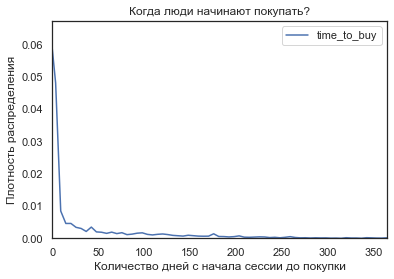

In [39]:
sns.kdeplot((visits['time_to_buy'] / np.timedelta64(1, 'D')))
plt.title('Когда люди начинают покупать?')
plt.xlabel('Количество дней с начала сессии до покупки')
plt.ylabel('Плотность распределения')
plt.xlim(0,365)
plt.show()

Итак, чаще всего люди делают заказ в этот же день, то есть обычно, в эту же сессию. Тогда 360 секунд - хороший результативный показатель длительности сессий, если он завершился покупкой. 

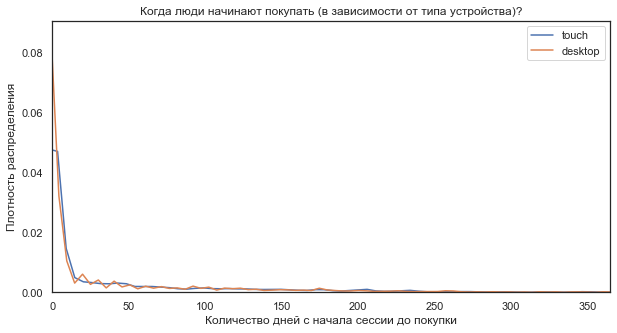

In [40]:
devices = visits.device.unique()
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.legend(devices)
plt.xlim(0,365)
plt.title('Когда люди начинают покупать (в зависимости от типа устройства)?')
plt.xlabel('Количество дней с начала сессии до покупки')
plt.ylabel('Плотность распределения')

for device in devices: 
    sns.kdeplot((visits[visits['device'] == device]['time_to_buy'] / np.timedelta64(1, 'D')), ax=ax, label=device)

Пользователи, зашедшие с мобильного телефона или планшета, реже покупают в один и тот же день начала первой сессии. Нужно внимательно изучить, почему. ВОзможно, не совсем удобен формат выбора мест в залах. Или неудобна корзина.

Добавим в таблицу `visits` данные о том, является ли данный пользователь, зашедший на сайт, покупателем.

In [41]:
ids_buyers = orders['uid'].unique()
visits.loc[visits['uid'].isin(ids_buyers), 'buyers'] = 'yes'
visits['buyers'] = visits['buyers'].fillna('no')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month,session_year,session_duration_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,first_buy_date,time_to_buy,buyers
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017,1080,2017-12-20,2017-12-01,2017-12-01,0,NaT,NaT,no
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018,1680,2018-02-19,2018-02-01,2018-02-01,0,NaT,NaT,no
2,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018,1440,2018-03-09,2018-03-01,2018-05-01,2,2018-03-09,0 days,yes
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,2017,60,2017-09-03,2017-09-01,2017-09-01,0,2017-09-04,1 days,yes
4,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,2018,3360,2017-06-29,2017-06-01,2018-01-01,7,NaT,NaT,no


##### Сколько покупателей в когорте?


In [42]:
buyers_cohorts = visits.pivot_table(index='first_visit_month', columns='buyers', values='uid', aggfunc='nunique')
buyers_cohorts['buyers_rate'] = buyers_cohorts['yes'] / ( buyers_cohorts['no']+buyers_cohorts['yes'])
buyers_cohorts['buyers_rate'] = (buyers_cohorts['buyers_rate'] * 100).round(2)

display(buyers_cohorts)

buyers,no,yes,buyers_rate
first_visit_month,,,
2017-06-01,9087,2798,23.54
2017-07-01,9426,2399,20.29
2017-08-01,7544,1670,18.12
2017-09-01,12118,3007,19.88
2017-10-01,18936,4602,19.55
2017-11-01,20642,4210,16.94
2017-12-01,19000,4030,17.50
2018-01-01,17492,3081,14.98
2018-02-01,16969,3204,15.88


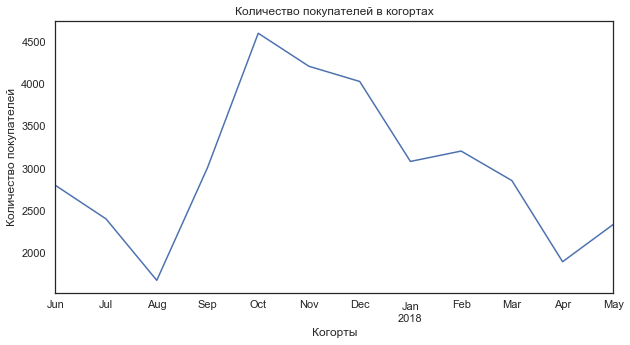

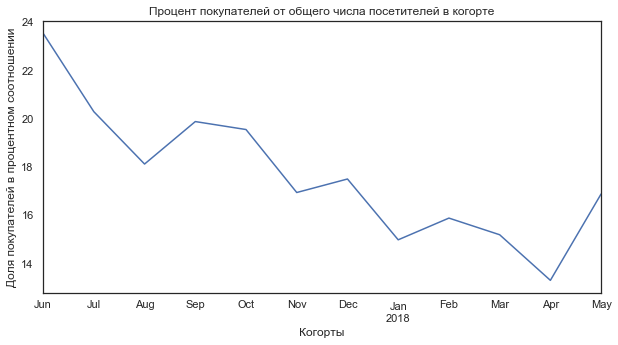

In [43]:
buyers_cohorts['yes'].plot(figsize=(10,5)) 
plt.title('Количество покупателей в когортах')
plt.xlabel('Когорты')
plt.ylabel('Количество покупателей')
plt.show()
buyers_cohorts['buyers_rate'].plot(figsize=(10,5))
plt.title('Процент покупателей от общего числа посетителей в когорте')
plt.xlabel('Когорты')
plt.ylabel('Доля покупателей в процентном соотношении')
plt.show()

На графике, отображающем количество покупателей в когортах отчетливо видно, что август и апрель - не самые потенциально прибыльные когорты. Пик по количеству покупателей приходится на октябрь. То есть люди, посетившие впервые сайт Яндекс.Афиша в это время, как правило, доходят до покупки в бОльшем количестве. С октября же происходит постепенное снижение.

Выходит, что в когорте июня 2017 года самый большой процент покупателей - 22 процента. И чем дальше, тем этот показатель все ниже. Раньше привлекали меньше пользователей, но они покупали чаще.
Когорта октября 2017 года, не смотря на то, что это когорта с самым бОльшим количеством покупателей, уровень покупателей ниже, чем в предыдущие месяцы. Может, люди стали более избирательнее?

В когорте мая произошло значительное увеличения доли покупателей, это радует. Возможно, проведенная рекламная кампания была намного успешнее предыдущих.

#### Сколько раз покупают за период?

In [44]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_year'] = orders['buy_ts'].dt.year
display(orders.head())

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,6,2017


In [45]:
dau_orders=orders.groupby('buy_date').agg({'uid':'count'})
display(dau_orders.head(10))

,uid
buy_date,
2017-06-01,96
2017-06-02,111
2017-06-03,67
2017-06-04,66
2017-06-05,161
2017-06-06,198
2017-06-07,197
2017-06-08,181
2017-06-09,131


              uid
count  363.000000
mean   138.881543
std     76.623567
min     15.000000
25%     83.000000
50%    136.000000
75%    177.000000
max    814.000000


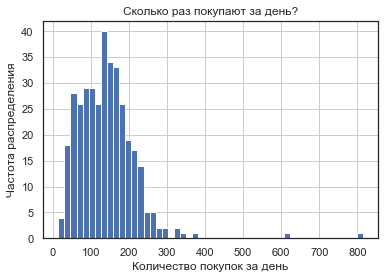

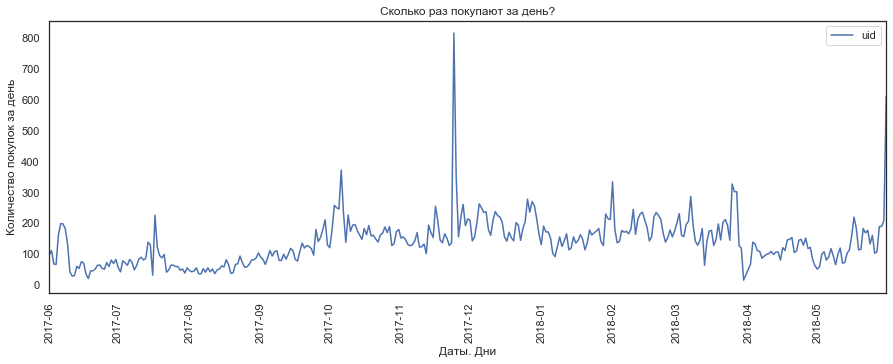

In [46]:
print(dau_orders.describe())

dau_orders.hist(bins=50)
plt.title('Сколько раз покупают за день?')
plt.xlabel('Количество покупок за день')
plt.ylabel('Частота распределения')
plt.show()

dau_orders.plot(figsize=(15,5), rot=90)
plt.title('Сколько раз покупают за день?')
plt.xlabel('Даты. Дни')
plt.ylabel('Количество покупок за день')
plt.show()


In [47]:
print(f'День с самыми высокими продажами : {dau_orders.index[dau_orders.uid == int(dau_orders.max())][0]}')
print(f'В среднем ежедневно на сайте Яндекс.Афиша происходит {int(dau_orders.mean())} продаж.')

День с самыми высокими продажами : 2017-11-24
В среднем ежедневно на сайте Яндекс.Афиша происходит 138 продаж.


Ежедневное количество покупок распределено нормально, 138 продаж - это среднее количество в день. В какие-то дни отмечается увеличение количества продаж, видимо связанных с днем недели или праздниками, также можно увидеть, что 24 ноября было осуществлено самое большое количество продаж - 814. Черная пятница, она такая.

В сентябре-марте заметно, что общее количество продаж существенно выше, чем в другой сезон. Что опять подтверждает сезонность спроса.


In [48]:
wau_orders=orders.groupby(['buy_year', 'buy_week']).agg({'uid':'count'})
display(wau_orders.head(10))

uid
buy_year buy_week     
2017     22        340
         23        938
         24        343
         25        371
         26        460
         27        477
         28        636
         29        716
         30        381
         31        314

               uid
count    53.000000
mean    951.207547
std     396.428108
min     314.000000
25%     636.000000
50%     991.000000
75%    1257.000000
max    1894.000000


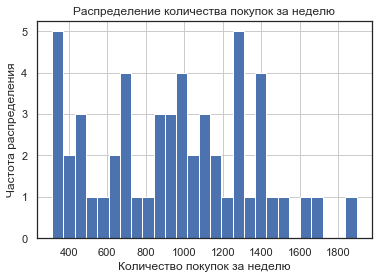

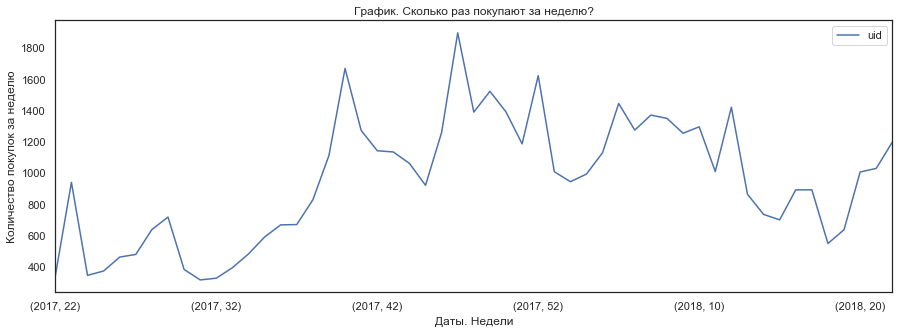

In [49]:
print(wau_orders.describe())
wau_orders.hist(bins=27)
plt.title('Распределение количества покупок за неделю')
plt.xlabel('Количество покупок за неделю')
plt.ylabel('Частота распределения')
plt.show()

wau_orders.plot(figsize=(15,5))
plt.title('График. Сколько раз покупают за неделю?')
plt.xlabel('Даты. Недели')
plt.ylabel('Количество покупок за неделю')
plt.show()




In [50]:
print(f'Неделя с самыми высокими продажами : {wau_orders.index[wau_orders.uid == int(wau_orders.max())][0]}')
print(f'В среднем еженедельно на сайте Яндекс.Афиша происходит {int(wau_orders.mean())} продажа.')

Неделя с самыми высокими продажами : (2017, 47)
В среднем еженедельно на сайте Яндекс.Афиша происходит 951 продажа.


951 продажа в среднем осуществляется за неделю на сайте ЯНдекс.Афиша. График также неоднороден, в какие-то неделю всплеск количества покупок, в какие-то - снижение. 

И опять, 47 неделя 2017 года впереди по количеству продаж, это 20-27 ноября, что неудивительно, так как самый популярный день именно на этой неделе - Черная Пятница.

In [51]:
mau_orders=orders.groupby(['buy_year', 'buy_month']).agg({'uid':'count'})
display(mau_orders)

uid
buy_year buy_month      
2017     6          2354
         7          2363
         8          1807
         9          3387
         10         5679
         11         5659
         12         6218
2018     1          4721
         2          5281
         3          5326
         4          3273
         5          4346

,uid
count,12.000000
mean,4201.166667
std,1511.972092
min,1807.000000
25%,3045.500000
50%,4533.500000
75%,5409.250000
max,6218.000000


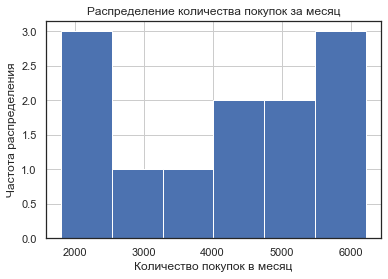

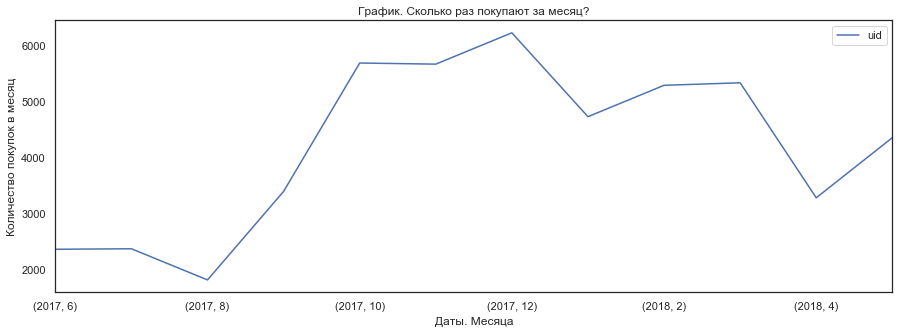

In [52]:
display(mau_orders.describe())
mau_orders.hist(bins=6)
plt.title('Распределение количества покупок за месяц')
plt.xlabel('Количество покупок в месяц')
plt.ylabel('Частота распределения')
plt.show()

mau_orders.plot(figsize=(15,5))
plt.title('График. Сколько раз покупают за месяц?')
plt.xlabel('Даты. Месяца')
plt.ylabel('Количество покупок в месяц')
plt.show()



In [53]:
print(f'Месяц с самыми высокими продажами : {mau_orders.index[mau_orders.uid == int(mau_orders.max())][0]}')
print(f'В среднем ежемесячно на сайте Яндекс.Афиша происходит {int(mau_orders.mean())} продажа.')

Месяц с самыми высокими продажами : (2017, 12)
В среднем ежемесячно на сайте Яндекс.Афиша происходит 4201 продажа.


На 8 месяце 2017 года наблюдалось самый низкий уровень количества продаж - 1807. Это в среднем продажи за 2 недели. Видимо, это тот месяц, когда особенно не до театров, кино и так далее - нужно успеть сьездить в отпуск, нагуляться перед школой/университетом.

Не смотря на то, что по еженедельным количествам продаж лидировала одна из недель ноября 2017 года, в месячном формате победил декабрь. Впечатления - самый лучший подарок.

В среднем за месяц совершаются 4200 продаж.

#### Какой средний чек?

In [54]:
orders.head()
orders_average_bill_date = orders.groupby('buy_date').agg({'revenue': 'sum', 'uid': 'count'})
orders_average_bill_date['avg_bill'] = (orders_average_bill_date['revenue'] / orders_average_bill_date['uid']).round(2)
display(orders_average_bill_date.head(10))

,revenue,uid,avg_bill
buy_date,,,
2017-06-01,389.459991,96,4.06
2017-06-02,324.110016,111,2.92
2017-06-03,166.479996,67,2.48
2017-06-04,195.210007,66,2.96
2017-06-05,441.489990,161,2.74
2017-06-06,543.929993,198,2.75
2017-06-07,485.980011,197,2.47
2017-06-08,443.850006,181,2.45
2017-06-09,566.510010,131,4.32


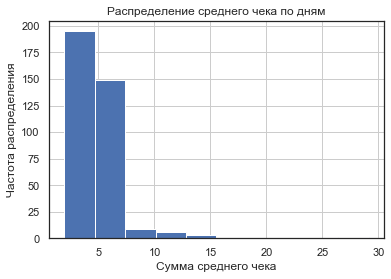

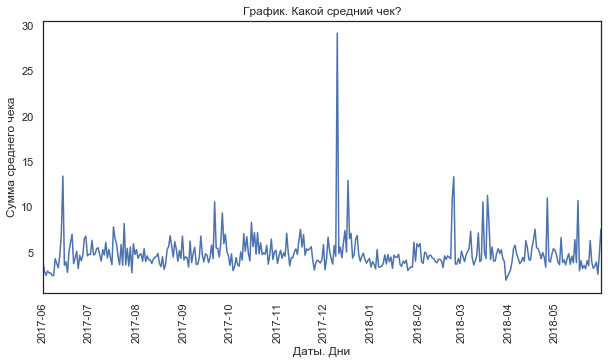

count    363.000000
mean       4.940413
std        2.022978
min        1.950000
25%        3.965000
50%        4.570000
75%        5.410000
max       29.130000
Name: avg_bill, dtype: float64


In [55]:
orders_average_bill_date['avg_bill'].hist()
plt.title('Распределение среднего чека по дням')
plt.xlabel('Сумма среднего чека')
plt.ylabel('Частота распределения')
plt.show()
orders_average_bill_date['avg_bill'].plot(figsize=(10,5), rot=90)
plt.title('График. Какой средний чек?')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Даты. Дни')
plt.show()
print(orders_average_bill_date['avg_bill'].describe())


In [56]:
print(f'День с самым высоким средним чеком: {orders_average_bill_date.index[orders_average_bill_date.avg_bill ==orders_average_bill_date.avg_bill.max()][0]}')
print(f'Средний ежедневный чек на сайте Яндекс.Афиша  {round(orders_average_bill_date.avg_bill.mean(), 2)} у.е.')

День с самым высоким средним чеком: 2017-12-10
Средний ежедневный чек на сайте Яндекс.Афиша  4.94 у.е.


Дневной средний чек составляет 4.94 у.е. При этом 10 декабря 2017 года - та дата, когда средний чек составлял 29 у.е., не зря декабрь -лидер по количеству продаж среди всех месяцев.

По графику нельщя сделать вывод, рос ли средний чек, так как влияют такие факторы как выходной/будний/предпразничный день, месяц и т.д. Гораздо информативнее будет посмотреть на средний чек за неделю/месяц.

In [57]:
orders_average_bill_week = orders.groupby(['buy_year', 'buy_week']).agg({'revenue': 'sum', 'uid': 'count'})
orders_average_bill_week['avg_bill'] = (orders_average_bill_week['revenue'] / orders_average_bill_week['uid']).round(2)
display(orders_average_bill_week.head(10))

revenue  uid  avg_bill
buy_year buy_week                            
2017     22        1075.260010  340      3.16
         23        2733.580078  938      2.91
         24        2020.390015  343      5.89
         25        1790.589966  371      4.83
         26        2407.439941  460      5.23
         27        2458.469971  477      5.15
         28        3148.689941  636      4.95
         29        4288.009766  716      5.99
         30        1911.589966  381      5.02
         31        1505.060059  314      4.79

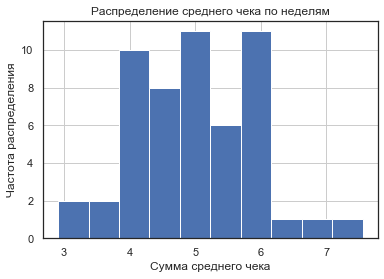

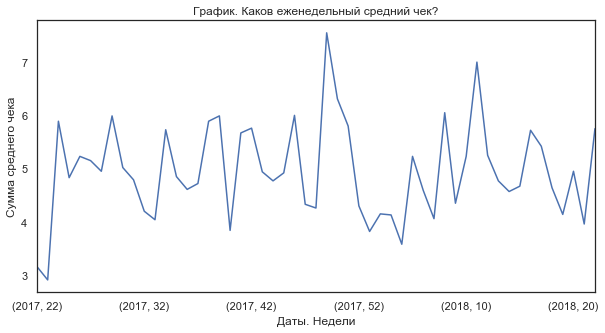

count    53.000000
mean      4.951509
std       0.905569
min       2.910000
25%       4.300000
50%       4.850000
75%       5.720000
max       7.550000
Name: avg_bill, dtype: float64


In [58]:
orders_average_bill_week['avg_bill'].hist()
plt.title('Распределение среднего чека по неделям')
plt.xlabel('Сумма среднего чека')
plt.ylabel('Частота распределения')
plt.show()
orders_average_bill_week['avg_bill'].plot(figsize=(10,5))
plt.title('График. Каков еженедельный средний чек?')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Даты. Недели')
plt.show()

print(orders_average_bill_week['avg_bill'].describe())



In [59]:
print(f'Неделя с самым высоким средним чеком: {orders_average_bill_week.index[orders_average_bill_week.avg_bill ==orders_average_bill_week.avg_bill.max()][0]}')
print(f'Средний еженедельный чек на сайте Яндекс.Афиша  {round(orders_average_bill_week.avg_bill.mean(), 2)} у.е.')

Неделя с самым высоким средним чеком: (2017, 49)
Средний еженедельный чек на сайте Яндекс.Афиша  4.95 у.е.


Если сравнивать с 23 неделей июня, средний чек рос и это уже хороший показатель. Однако, он несколько снижался в начале года, что может быть связано с каникулярными неделями в январе. Стоит внимательнее рассмотреть месячный средний чек в следующем подшаге.

49 неделя 2017 года лидирует по размеру недельного среднего чека. Эта неделя с 10 декабрем, лидером по размеру дневного среднего чека. Время покупать подарки.

Средний недельний чек незначительно выше дневного чека.

In [60]:
orders_average_bill_month = orders.groupby(['buy_year', 'buy_month']).agg({'revenue': 'sum', 'uid': 'count'})
orders_average_bill_month['avg_bill'] = (orders_average_bill_month['revenue'] / orders_average_bill_month['uid']).round(2)
display(orders_average_bill_month)

revenue   uid  avg_bill
buy_year buy_month                              
2017     6           9557.490234  2354      4.06
         7          12539.469727  2363      5.31
         8           8758.780273  1807      4.85
         9          18345.509766  3387      5.42
         10         27987.699219  5679      4.93
         11         27069.929688  5659      4.78
         12         36388.601562  6218      5.85
2018     1          19417.130859  4721      4.11
         2          25560.541016  5281      4.84
         3          28834.589844  5326      5.41
         4          16858.060547  3273      5.15
         5          20735.980469  4346      4.77

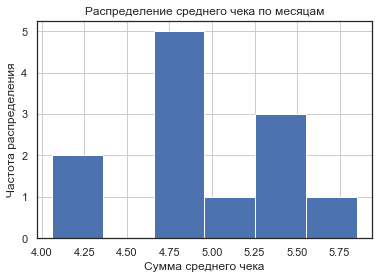

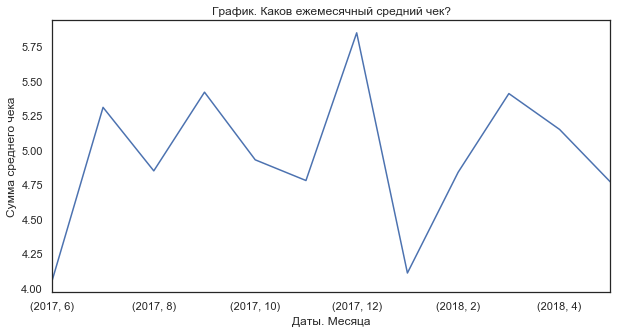

count    12.000000
mean      4.956667
std       0.521629
min       4.060000
25%       4.777500
50%       4.890000
75%       5.335000
max       5.850000
Name: avg_bill, dtype: float64


In [61]:
orders_average_bill_month['avg_bill'].hist(bins=6)
plt.title('Распределение среднего чека по месяцам')
plt.xlabel('Сумма среднего чека')
plt.ylabel('Частота распределения')
plt.show()

orders_average_bill_month['avg_bill'].plot(figsize=(10,5))
plt.title('График. Каков ежемесячный средний чек?')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Даты. Месяца')
plt.show()


print(orders_average_bill_month['avg_bill'].describe())

In [62]:
print(f'Месяц с самым высоким средним чеком: {orders_average_bill_month.index[orders_average_bill_month.avg_bill ==orders_average_bill_month.avg_bill.max()][0]}')
print(f'Средний ежемесячный чек на сайте Яндекс.Афиша  {round(orders_average_bill_month.avg_bill.mean(), 2)} у.е.')

Месяц с самым высоким средним чеком: (2017, 12)
Средний ежемесячный чек на сайте Яндекс.Афиша  4.96 у.е.


Средний чек за месяц незначительно выше недельного среднего чека. Он сглаживает неравномерность недель с праздниками. Однако, декабрь - в лидерах из за самого ожидаемого и широко празднующего праздника в России. 

На графике отчетливо видно резкое снижение месячного среднего чека в июне и январе. Существуют досточно объективные причины для снижения покупательской активности: в январе после праздников у населения попросту нет денег, в июне - сессии, закрытие квартала, а может и начало отпусков у людей. Необходимо более детально проанализировать эти месяцы на предмет возможности увеличение среднего чека.



#### Сколько денег приносят? (LTV)

##### Каковы объемы продаж и количество заказов за месяц?

In [63]:
display(orders.head())

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,6,2017


revenue   uid
buy_year buy_month                    
2017     6           9557.490234  2354
         7          12539.469727  2363
         8           8758.780273  1807
         9          18345.509766  3387
         10         27987.699219  5679
         11         27069.929688  5659
         12         36388.601562  6218
2018     1          19417.130859  4721
         2          25560.541016  5281
         3          28834.589844  5326
         4          16858.060547  3273
         5          20735.980469  4346

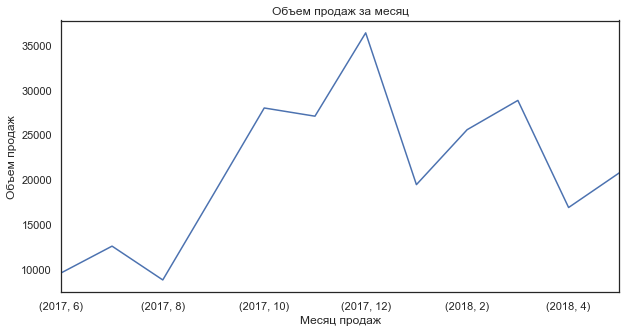

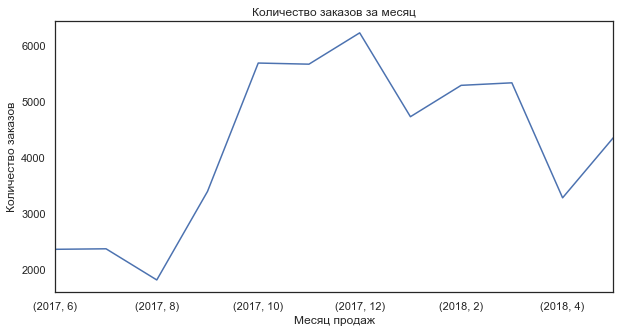

In [64]:
revenue_per_month = orders.groupby(['buy_year', 'buy_month']).agg({'revenue': 'sum', 'uid': 'count'})
display(revenue_per_month)
revenue_per_month['revenue'].plot(figsize=(10,5))
plt.title('Объем продаж за месяц')
plt.xlabel('Месяц продаж')
plt.ylabel('Объем продаж')
plt.show()
revenue_per_month['uid'].plot(figsize=(10,5))
plt.title('Количество заказов за месяц')
plt.xlabel('Месяц продаж')
plt.ylabel('Количество заказов')
plt.show()

Средний чек был максимален в декабре 2017 года, объем продаж тоже самый высокий. При этом можно заметить, что при увеличении количества заказов, увеличивается и объем продаж, так как их соотношение - средний чек по месяцам примерно на одном уровне.

Самый неприбыльный месяц - август. Все в отпусках и на каникулах.


##### Выручка и количество заказов на покупателя

In [65]:
revenue_per_user = orders.groupby('uid').agg({'revenue': 'sum', 'buy_ts': 'count'})
revenue_per_user.columns= ['revenue_per_user', 'n_purchases']
display(revenue_per_user.head())
display(revenue_per_user.describe())

,revenue_per_user,n_purchases
uid,,
313578113262317,0.550000,1
1575281904278712,3.050000,2
2429014661409475,73.330002,1
2464366381792757,2.440000,1
2551852515556206,10.990000,2


,revenue_per_user,n_purchases
count,36522.000000,36522.000000
mean,6.901423,1.380373
std,88.129738,3.454508
min,0.000000,1.000000
25%,1.470000,1.000000
50%,3.050000,1.000000
75%,5.800000,1.000000
max,11810.179688,239.000000


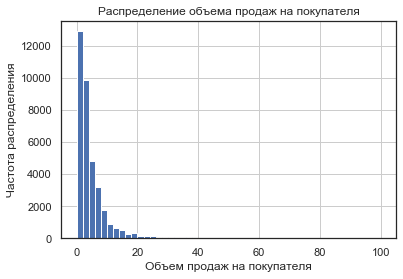

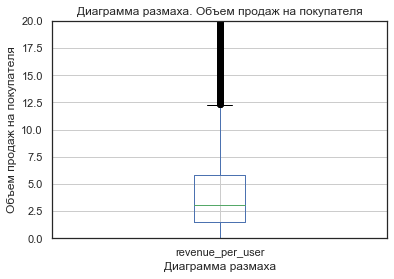

В среднем на пользователя приходится объем продаж, равный 3.049999952316284 у.е.


In [66]:
revenue_per_user['revenue_per_user'].hist(bins=50, range=(0,100))
plt.title('Распределение объема продаж на покупателя')
plt.ylabel('Частота распределения')
plt.xlabel('Объем продаж на покупателя')
plt.show()
revenue_per_user.boxplot(column='revenue_per_user')
plt.title('Диаграмма размаха. Объем продаж на покупателя')
plt.ylabel('Объем продаж на покупателя')
plt.xlabel('Диаграмма размаха')
plt.ylim(0, 20)
plt.show()
print(f'В среднем на пользователя приходится объем продаж, равный {round(revenue_per_user.revenue_per_user.median(), 2)} у.е.')

Не смотря на максимальное значение объема продаж, равное 11810 у.е., в среднем на пользователя приходится чуть больше 3 у.е. В основном объем продаж на человека не превышает 12,5 у.е.

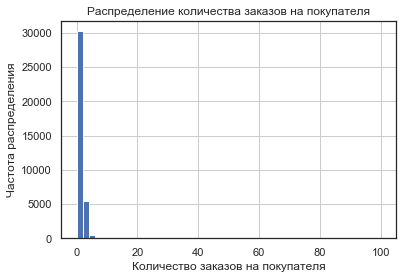

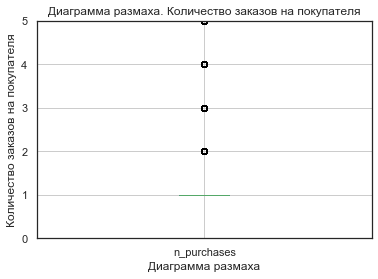

В основном люди совершают 1 заказ


In [67]:
revenue_per_user['n_purchases'].hist(bins=50, range=(0,100))
plt.title('Распределение количества заказов на покупателя')
plt.ylabel('Частота распределения')
plt.xlabel('Количество заказов на покупателя')
plt.show()
revenue_per_user.boxplot(column='n_purchases')
plt.title('Диаграмма размаха. Количество заказов на покупателя')
plt.ylabel('Количество заказов на покупателя')
plt.xlabel('Диаграмма размаха')
plt.ylim(0, 5)
plt.show()

print(f'В основном люди совершают {int(revenue_per_user.n_purchases.mode())} заказ')

В большинстве своем люди проводят на сайте 360 секунд и делают 1 покупку в эту же сессию. Остальные значения очень редки.

##### Выручка и количество заказов по когортам

Для дальнейшего анализа объема продаж и количества заказов по когортам, необходимо добавить в таблице `orders` информацию о первом месяце посещения пользователя, то есть, дату создания когорты

In [68]:
orders['buy_date'] = pd.to_datetime(orders['buy_date'])
orders['buy_month'] = orders['buy_date'].astype('datetime64[M]')

In [69]:
first_month_order = orders.groupby('uid')['buy_month'].min().reset_index()
first_month_order.columns = ['uid', 'first_buy_month']
display(first_month_order.head(10))

cohort_sizes = first_month_order.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
display(cohort_sizes.head(10))

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
5,3077748354309989,2018-03-01
6,3605148382144603,2017-09-01
7,3753586865891862,2018-03-01
8,4808417689019433,2018-01-01
9,4992223027560440,2018-04-01


,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [70]:
orders_new = pd.merge(orders, first_month_order, on='uid')
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 8 columns):
buy_ts             50414 non-null datetime64[ns]
revenue            50414 non-null float32
uid                50414 non-null uint64
buy_date           50414 non-null datetime64[ns]
buy_week           50414 non-null int64
buy_month          50414 non-null datetime64[ns]
buy_year           50414 non-null int64
first_buy_month    50414 non-null datetime64[ns]
dtypes: datetime64[ns](4), float32(1), int64(2), uint64(1)
memory usage: 3.3 MB


In [71]:
#  Добавим информацию о когорте и возрасте когорты
orders_new['buy_date'] = pd.to_datetime(orders_new['buy_date'])
orders_new['buy_month'] = orders_new['buy_date'].astype('datetime64[M]')


display(orders_new.sample(10))

,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year,first_buy_month
6003,2018-02-13 20:52:00,3.30,6690431030011795835,2018-02-13,7,2018-02-01,2018,2017-07-01
50162,2018-05-31 12:50:00,3.54,6168900460675818699,2018-05-31,22,2018-05-01,2018,2018-05-01
33064,2018-01-15 16:23:00,4.89,17402550971918840003,2018-01-15,3,2018-01-01,2018,2018-01-01
26847,2017-12-08 12:57:00,2.75,7233789040112213172,2017-12-08,49,2017-12-01,2017,2017-12-01
49143,2018-05-24 11:08:00,3.05,9740140958478657917,2018-05-24,21,2018-05-01,2018,2018-05-01
48727,2018-05-20 19:45:00,9.78,4979642422318346657,2018-05-20,20,2018-05-01,2018,2018-05-01
38516,2018-02-19 15:06:00,0.43,22538937500067142,2018-02-19,8,2018-02-01,2018,2018-02-01
41096,2018-03-09 18:40:00,1.17,4259731956464655593,2018-03-09,10,2018-03-01,2018,2018-03-01
29660,2017-12-24 12:29:00,3.05,16814431607100734852,2017-12-24,51,2017-12-01,2017,2017-12-01
19796,2018-03-01 08:30:00,1.22,7103173002200051683,2018-03-01,9,2018-03-01,2018,2017-11-01


In [72]:
revenue_by_cohorts = orders_new.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum', 'uid': 'count'})
revenue_by_cohorts.columns = ['revenue', 'n_orders']
revenue_by_cohorts = revenue_by_cohorts.reset_index()
display(revenue_by_cohorts)

,first_buy_month,buy_month,revenue,n_orders
0,2017-06-01,2017-06-01,9557.490234,2354
1,2017-06-01,2017-07-01,981.820007,177
2,2017-06-01,2017-08-01,885.340027,174
3,2017-06-01,2017-09-01,1931.300049,226
4,2017-06-01,2017-10-01,2068.580078,292
...,...,...,...,...
73,2018-03-01,2018-04-01,1063.050049,178
74,2018-03-01,2018-05-01,1114.869995,176
75,2018-04-01,2018-04-01,10600.690430,2495
76,2018-04-01,2018-05-01,1209.920044,195


In [73]:
revenue_by_cohorts['age'] = (revenue_by_cohorts['buy_month'] - revenue_by_cohorts['first_buy_month'])/ np.timedelta64(1, 'M')
revenue_by_cohorts['age'] = revenue_by_cohorts['age'].round().astype('int')
display(revenue_by_cohorts)

,first_buy_month,buy_month,revenue,n_orders,age
0,2017-06-01,2017-06-01,9557.490234,2354,0
1,2017-06-01,2017-07-01,981.820007,177,1
2,2017-06-01,2017-08-01,885.340027,174,2
3,2017-06-01,2017-09-01,1931.300049,226,3
4,2017-06-01,2017-10-01,2068.580078,292,4
...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.050049,178,1
74,2018-03-01,2018-05-01,1114.869995,176,2
75,2018-04-01,2018-04-01,10600.690430,2495,0
76,2018-04-01,2018-05-01,1209.920044,195,1


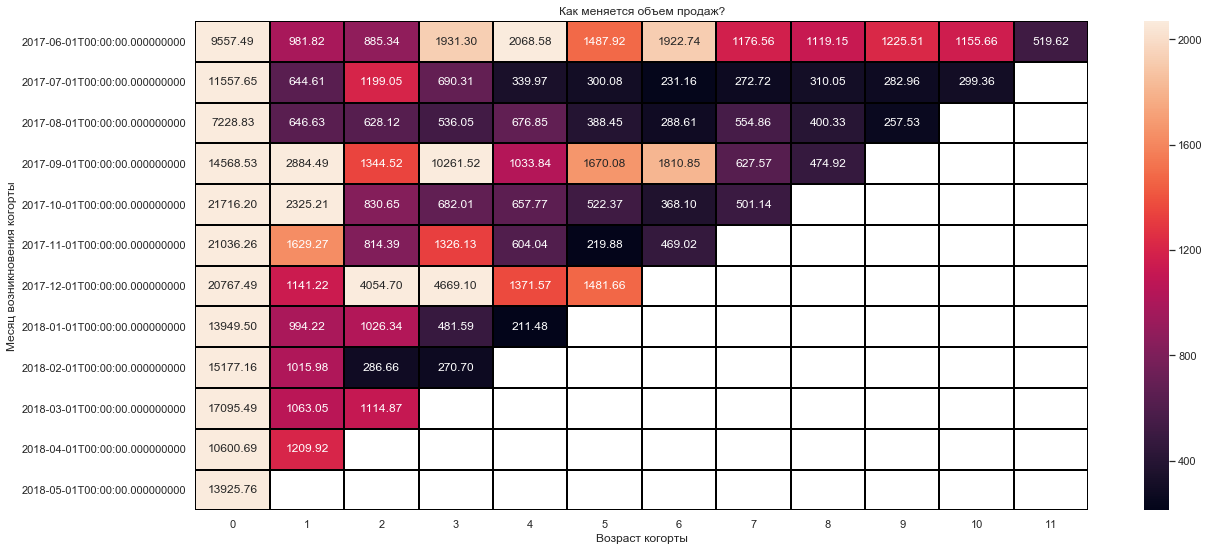

In [74]:
revenue_cohorts_pivot = revenue_by_cohorts.pivot_table(
    index='first_buy_month',
    columns = 'age',
    values= 'revenue',
    aggfunc='sum'
)
sns.set(style='white');
plt.figure(figsize=(20,9));
plt.title('Как меняется объем продаж?');
sns.heatmap(revenue_cohorts_pivot, annot=True,fmt='.2f', linewidths=1, linecolor='black', vmax=2070);
plt.xlabel('Возраст когорты');
plt.ylabel('Месяц возникновения когорты');

Сразу бросается в глаза июньская когорта 2017 года - продажи увеличивались с переменным успехом в каждом месяце существования когорты, вплоть до 11 месяца.

Август и апрель - самые неприбыльные когорты. Август - пора отпусков, последний месяц лета. А в апреле люди тоже хотят отдыхать, планируют свои праздничные майские дни. КРоме того, процент покупателей в когорте апреля существенно ниже остальных когорт.

Октябрьская когорта - самая прибыльная среди месяцев существования когорт, но  сентябрьская когорта показало сущнественное увеличение продаж в декабре, скорее всего именно эта когорта в большинстве своем сделала всю прибыль самого успешного дня - 10 декабря 2017 года.

Следом идут ноябрьская и декабрьская когорты, показав неплохой объем продаж в месяц своего образования.Следом идут ноябрьская и декабрьская когорты, показав неплохой объем продаж в месяц своего образования.

In [75]:
n_purchases_by_cohorts = revenue_by_cohorts.pivot_table(
    index='first_buy_month',
    columns='age',
    values='n_orders',
    aggfunc='sum'
)


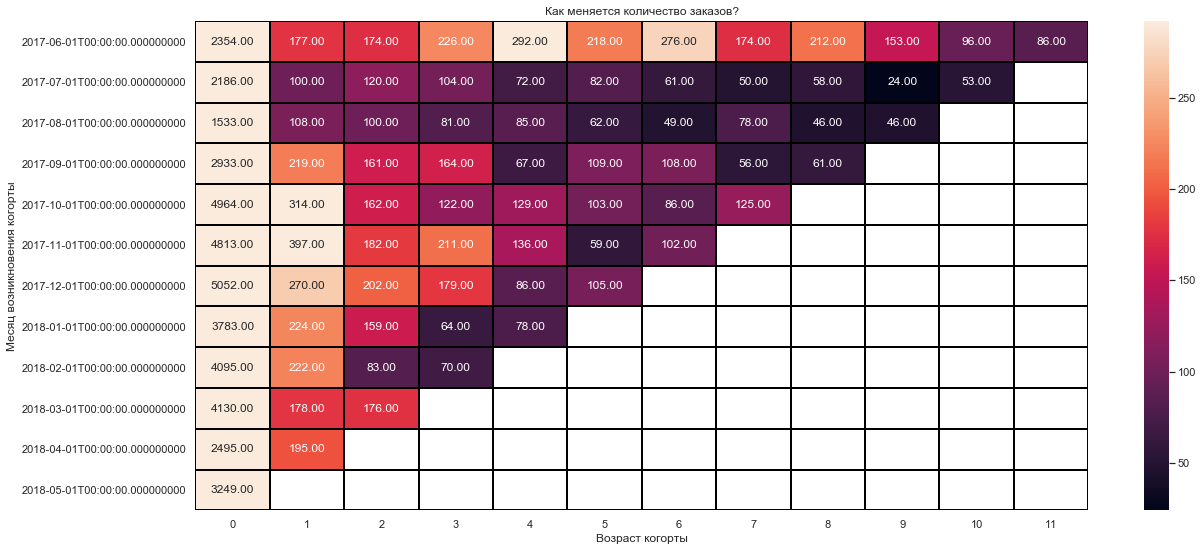

In [76]:
sns.set(style='white');
plt.figure(figsize=(20,9));
plt.title('Как меняется количество заказов?');
sns.heatmap(n_purchases_by_cohorts, annot=True,fmt='.2f', linewidths=1, linecolor='black', vmax=292);
plt.xlabel('Возраст когорты');
plt.ylabel('Месяц возникновения когорты');

По количеству заказов лидируют октябрьская, ноябрьская и декабрьские когорты - образовавшись не так далеко до новогодних праздников, вполне возможно, что основная часть заказов - именно на декабрь-январь.

Будучи самой неприбыльной когортой, август также в конце списка по количеству заказов.

В целом прослеживается отрицательная динамика - постепенное снижения количества заказов с каждым месяцем. Тем мне менее, июньская когорта очень отличается попеременным ростом количества заказов. Самая верная сервису когорта.

##### Расчет LTV

Для расчета LTV по когортам формируем таблицу с количеством покупателей, суммой прибыли по когортам.

In [77]:
report = pd.merge(cohort_sizes, revenue_by_cohorts, on='first_buy_month')
display(report.head(10))

,first_buy_month,n_buyers,buy_month,revenue,n_orders,age
0,2017-06-01,2023,2017-06-01,9557.490234,2354,0
1,2017-06-01,2023,2017-07-01,981.820007,177,1
2,2017-06-01,2023,2017-08-01,885.340027,174,2
3,2017-06-01,2023,2017-09-01,1931.300049,226,3
4,2017-06-01,2023,2017-10-01,2068.580078,292,4
5,2017-06-01,2023,2017-11-01,1487.920044,218,5
6,2017-06-01,2023,2017-12-01,1922.739990,276,6
7,2017-06-01,2023,2018-01-01,1176.560059,174,7
8,2017-06-01,2023,2018-02-01,1119.150024,212,8
9,2017-06-01,2023,2018-03-01,1225.510010,153,9


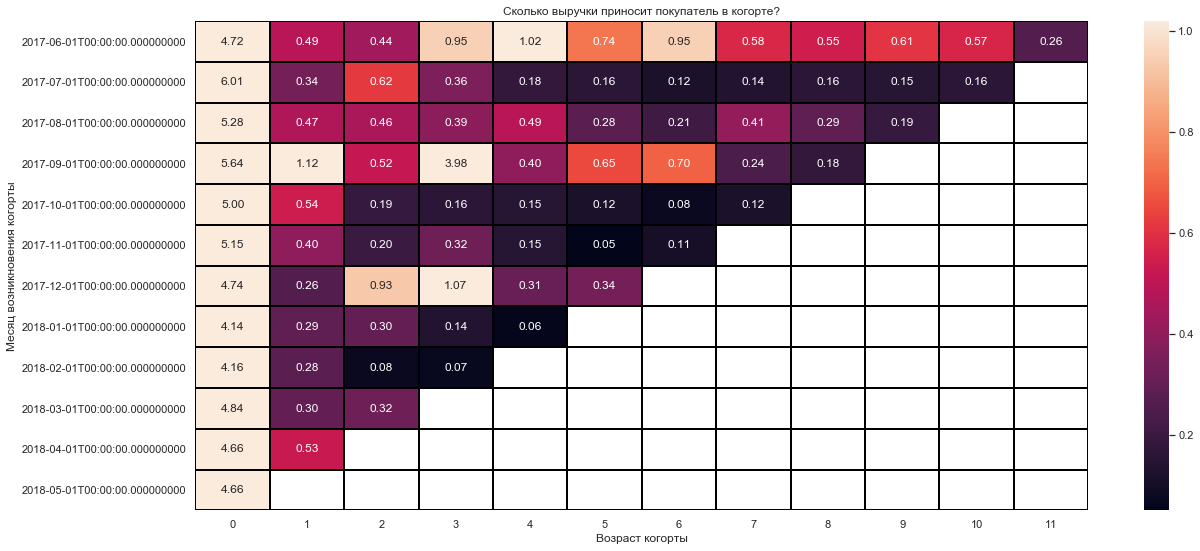

In [78]:
# Расчет показателя ltv
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_buy_month',
    columns = 'age',
    values='ltv',
    aggfunc = 'mean').round(2)

sns.set(style='white');
plt.figure(figsize=(20,9));
plt.title('Сколько выручки приносит покупатель в когорте?');
sns.heatmap(output, annot=True,fmt='.2f', linewidths=1, linecolor='black', vmax=1.02);
plt.xlabel('Возраст когорты');
plt.ylabel('Месяц возникновения когорты');

Итак, можно заметить, что выделяется больше всех сентябрьская когорта, которая в декабре 2018 года принесла больше всех выручки с покупателя. Должно быть, и вправда успешная рекламная компания.

Подсчитаем накопленную выручку каждой из когорт для более ясного представлении о наиболее успешных когортах.

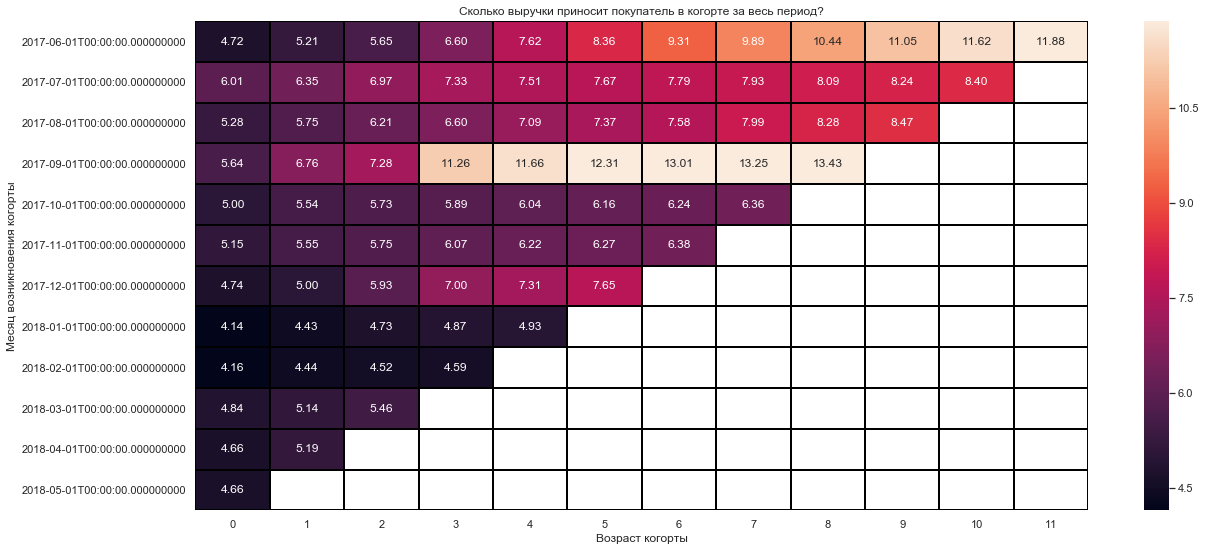

In [79]:
sns.set(style='white');
plt.figure(figsize=(20,9));
plt.title('Сколько выручки приносит покупатель в когорте за весь период?');
sns.heatmap(output.cumsum(axis=1), annot=True,fmt='.2f', linewidths=1, linecolor='black', vmax=11.88);
plt.xlabel('Возраст когорты');
plt.ylabel('Месяц возникновения когорты');

По выручке с каждого покупателя из когорты лидирует сентябрьская когорта. Эта та категория пользователей, которая принесла больше денег из расчета на покупателя.

Следом идет самая "долгая" когорта июня, которая за 12 месяцев своего существования принесла почти 12 у.е. с покупателя.

Февральская и январьская когорты принесла меньше всего денег с покупателя. Не смотря на то, что апрель - самый неприбыльный месяц. 



### Яндекс.Афиша. Продажи. Выводы: ### 

Обычно люди делают заказ на Яндекс.Афиша сразу же, в тот же день. Тогда 360 секунд для одной сессии - то, что надо для совершения заказа. Однако люди, зашедшие через мобильную версию сайта, гораздо реже покупают в тот же день. Вполне невозможно, есть проблема с выбором мест в залах театров, кинотеатров.

В когорте июня 2017 года самый большой процент покупателей - 22 процента. И чем дальше, тем этот показатель все ниже. Когорта октября - это когорта с самым бОльшим количеством покупателей, но уровень покупателей ниже, чем в предыдущие месяцы. Раньше привлекали меньше людей, но покупали они чаще. Может быть, дело в избирательности и в бОльшем разнообразии подобных сервисов.

Самый посещаемый месяц на Яндекс.Афиша - ноябрь - не совпал с самым прибыльным - декабрь. Тем не менее, цель покупки могла быть одна - приближающиеся праздники. Также возможно, что 10 декабря была проведена очень успешная рекламная кампания.

Самый высокий дневной средний чек также пришелся на самый прибыльный день 10 декабря 2017 года. В этот день покупали не только больше всего людей, но и они покупали больше, чем когда-либо за год. В январе и июне прослеживается резкое снижение среднего чека - после самого главного праздника и долгих каникул у людей нет денег, а перед сезоном отпусков и каникул - желания (хочется быть на улице или заграницей).

По количеству заказов и объему продаж лидируют октябрьская, ноябрьская и декабрьские когорты - образовавшись не так далеко до новогодних праздников, вполне возможно, что основная часть заказов - именно на декабрь-январь.

Будучи самой неприбыльной когортой, август также в конце списка по количеству заказов.

По выручке с каждого покупателя из когорты лидирует сентябрьская когорта. Эта та категория пользователей, которая принесла больше денег из расчета на покупателя. Февральская и январьская когорты принесла меньше всего денег с покупателя..

Тем не менее, некоторые когорты все же не так давно существуют, чтобы делать выводы об их успешности. Необходимо принять во внимание затраты на привлечение и окупаемость этих затрат.

### <a id="step2.3">Яндекс.Афиша. Маркетинг </a>


In [80]:
costs.info()
display(costs.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int8
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int8(1)
memory usage: 42.3 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [81]:
# сформируем таблицу с id покупателей и первоначальным источником привлечения и устройству.
data_users= visits[visits['buyers']=='yes'].groupby('uid').agg({'source_id': 'first', 'device': 'first'}).reset_index()
data_users.info()
display(data_users.head())

# создаем группированную таблицу с данными о количестве покупателей по источнику и используемому девайсу
grouped_data_source = data_users.groupby(['source_id', 'device'])['uid'].nunique().reset_index()
display(grouped_data_source)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36080 entries, 0 to 36079
Data columns (total 3 columns):
uid          36080 non-null uint64
source_id    36080 non-null int8
device       36080 non-null object
dtypes: int8(1), object(1), uint64(1)
memory usage: 599.1+ KB


,uid,source_id,device
0,313578113262317,2,desktop
1,1575281904278712,10,touch
2,2429014661409475,3,desktop
3,2464366381792757,5,desktop
4,2551852515556206,5,desktop


,source_id,device,uid
0,1,desktop,2913
1,1,touch,848
2,2,desktop,3234
3,2,touch,1015
4,3,desktop,7564
5,3,touch,1456
6,4,desktop,7514
7,4,touch,2175
8,5,desktop,5621
9,5,touch,1137


Определенно, покупателей, зашедшие на сайт через компьютер, больше.


Присоединим данные о покупателях, источнику привлечения и устройству, в таблицу `orders_new`

In [82]:
orders_new = orders_new.merge(data_users, how='left', on='uid')
orders_new.info()
display(orders_new.head(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 10 columns):
buy_ts             50414 non-null datetime64[ns]
revenue            50414 non-null float32
uid                50414 non-null uint64
buy_date           50414 non-null datetime64[ns]
buy_week           50414 non-null int64
buy_month          50414 non-null datetime64[ns]
buy_year           50414 non-null int64
first_buy_month    50414 non-null datetime64[ns]
source_id          49940 non-null float64
device             49940 non-null object
dtypes: datetime64[ns](4), float32(1), float64(1), int64(2), object(1), uint64(1)
memory usage: 4.0+ MB


,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year,first_buy_month,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017,2017-06-01,1.0,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017,2017-06-01,3.0,desktop
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,22,2017-06-01,2017,2017-06-01,3.0,desktop
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,22,2017-06-01,2017,2017-06-01,5.0,desktop
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-05,23,2017-06-01,2017,2017-06-01,5.0,desktop
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,22,2017-06-01,2017,2017-06-01,1.0,desktop
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,22,2017-06-01,2017,2017-06-01,1.0,desktop


#### Сколько денег потратили? Всего / на каждый источник / по времени

In [83]:
print(f'Всего потратили на привлечение {costs.costs.sum()} у.е.')

Всего потратили на привлечение 329131.62 у.е.


##### Сколько потратили на каждый источник?

In [84]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
display(costs_by_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


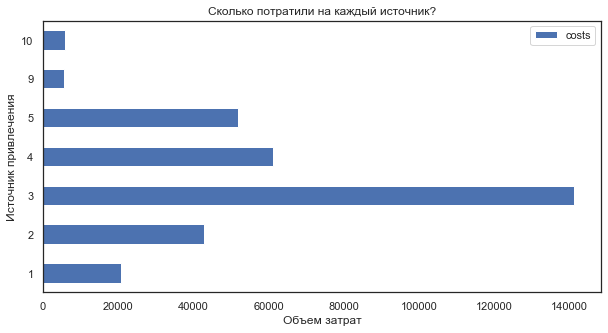

In [85]:
costs_by_source.plot(x='source_id', y='costs', figsize=(10,5), kind='barh')
plt.title('Сколько потратили на каждый источник?');
plt.xlabel('Объем затрат');
plt.ylabel('Источник привлечения');
plt.show();

На каждый источник тратили по-разному. Но самый дорогой - 3. Нужно посмотреть, является ли он самым прибыльным.

##### Сколько потратили по времени?

In [86]:
costs['month'] = costs['dt'].astype('datetime64[M]')

costs_by_month = costs.groupby('month')['costs'].sum().reset_index()
print(costs_by_month)

        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


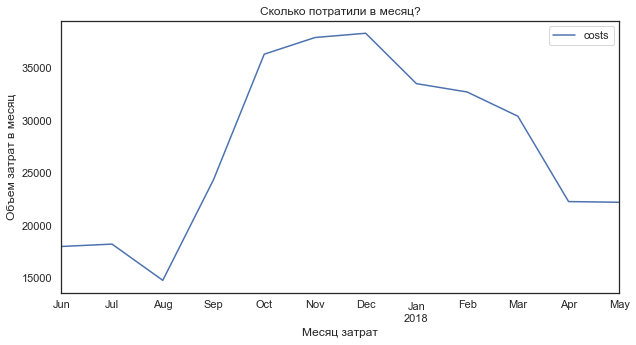

In [87]:
costs_by_month.plot(x='month', y='costs', figsize=(10,5))
plt.title('Сколько потратили в месяц?');
plt.xlabel('Месяц затрат');
plt.ylabel('Объем затрат в месяц');
plt.show();

Самая затратная когорта - когорта декабря, наименее - август. И ведь именно август - наименее прибыльный месяц. График практически совпадает с графиком прибыльности.

#### Сколько стоило привлечение одного покупателя из каждого источника?

Для начала нужно рассчитать число покупателей из каждого источника

In [88]:
buyers_by_source = visits[visits.buyers=='yes'].groupby('source_id')['uid'].nunique()
buyers_by_source.name = 'n_buyers'
buyers_by_source = buyers_by_source.reset_index()
display(buyers_by_source)

,source_id,n_buyers
0,1,6929
1,2,7050
2,3,13298
3,4,13770
4,5,9781
5,7,1
6,9,2645
7,10,1710


In [89]:
costs_by_source = costs_by_source.merge(buyers_by_source, on='source_id')
costs_by_source['costs_by_buyer'] = costs_by_source['costs'] / costs_by_source['n_buyers']
display(costs_by_source)

,source_id,costs,n_buyers,costs_by_buyer
0,1,20833.27,6929,3.006678
1,2,42806.04,7050,6.071779
2,3,141321.63,13298,10.627285
3,4,61073.60,13770,4.435265
4,5,51757.10,9781,5.291596
5,9,5517.49,2645,2.086008
6,10,5822.49,1710,3.404965


Наиболее затратный источник для привлечения на покупателя - 3, наименее - 9. Интересно, что 7 источника нет в затратах, но есть покупатель есть.

#### На сколько окупились расходы? (ROI)

##### 1. Расчет ROMI по когортам

###### Расчет выручки по когортам

In [90]:
display(report)
ltv_by_cohorts = report.groupby('first_buy_month')['ltv'].sum().reset_index()
display(ltv_by_cohorts)

,first_buy_month,n_buyers,buy_month,revenue,n_orders,age,ltv
0,2017-06-01,2023,2017-06-01,9557.490234,2354,0,4.724414
1,2017-06-01,2023,2017-07-01,981.820007,177,1,0.485329
2,2017-06-01,2023,2017-08-01,885.340027,174,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.300049,226,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.580078,292,4,1.022531
...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.050049,178,1,0.300892
74,2018-03-01,3533,2018-05-01,1114.869995,176,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.690430,2495,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.920044,195,1,0.531599


,first_buy_month,ltv
0,2017-06-01,11.879234
1,2017-07-01,8.386854
2,2017-08-01,8.471723
3,2017-09-01,13.435227
4,2017-10-01,6.360242
5,2017-11-01,6.395244
6,2017-12-01,7.639913
7,2018-01-01,4.940151
8,2018-02-01,4.587921
9,2018-03-01,5.455253


###### Расчет ROMI

In [91]:
# добавим информацию о затратах на когорту в таблицу с когортами, возрастом и ltv
report_new = pd.merge(report, costs_by_month, left_on='first_buy_month', right_on='month')
report_new.info()
display(report_new.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 9 columns):
first_buy_month    78 non-null datetime64[ns]
n_buyers           78 non-null int64
buy_month          78 non-null datetime64[ns]
revenue            78 non-null float32
n_orders           78 non-null int64
age                78 non-null int32
ltv                78 non-null float64
month              78 non-null datetime64[ns]
costs              78 non-null float64
dtypes: datetime64[ns](3), float32(1), float64(2), int32(1), int64(2)
memory usage: 5.5 KB


,first_buy_month,n_buyers,buy_month,revenue,n_orders,age,ltv,month,costs
0,2017-06-01,2023,2017-06-01,9557.490234,2354,0,4.724414,2017-06-01,18015.0
1,2017-06-01,2023,2017-07-01,981.820007,177,1,0.485329,2017-06-01,18015.0
2,2017-06-01,2023,2017-08-01,885.340027,174,2,0.437637,2017-06-01,18015.0
3,2017-06-01,2023,2017-09-01,1931.300049,226,3,0.954671,2017-06-01,18015.0
4,2017-06-01,2023,2017-10-01,2068.580078,292,4,1.022531,2017-06-01,18015.0


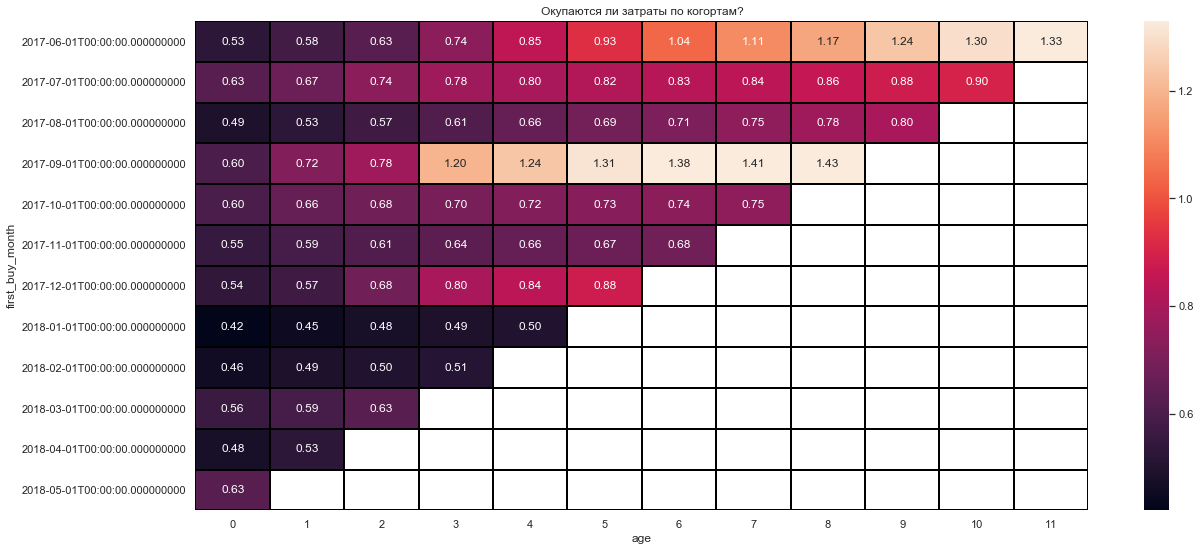

In [92]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac'] 
output_new = report_new.pivot_table(
    index='first_buy_month',
    columns='age',
    values='romi',
    aggfunc='mean').round(2)
sns.set(style='white');
plt.figure(figsize=(20,9));
plt.title('Окупаются ли затраты по когортам?');
sns.heatmap(output_new.cumsum(axis=1), annot=True,fmt='.2f', linewidths=1, linecolor='black', vmax=1.33);


Окупилась точно первая когорта - июньская, должно быть, в силу своей долгой "жизни". Также на 8 месяце окупилась и сентябрьская когорта - когорта с самой высокой прибыльностью. При этом январьская и февральская когорты наименее близки к будущей окупаемости, значения romi на 3-4 возрасте когорты значительно romi тех же возрастов у других когорт.

Тем не менее, правильнее будет посмотреть на показатели средней когорты за каждый месяц ее жизни:

In [93]:
print(output_new.cumsum(axis=1).mean(axis=0))

age
0     0.540833
1     0.580000
2     0.630000
3     0.718889
4     0.783750
5     0.861429
6     0.896667
7     0.972000
8     1.060000
9     0.973333
10    1.100000
11    1.330000
dtype: float64


В среднем когорты окупаются на 8 или 10 месяце жизни. При этом приносят прибыль на 11 месяце. Конечно, тут влияет множество факторов - сезонность, праздники, маркетинговые кампании. 


##### 1. Расчет ROMI на покупателя по источнику

##### Расчет выручки по источнику привлечения

In [94]:
# создадим таблицу с суммарной выручкой по каждому покупателю
revenue_users = orders_new.groupby('uid')['revenue'].sum().reset_index()
display(revenue_users)

# создадим таблицу со списком покупателей и источнику привлечению
users_by_source = visits[visits['buyers']=='yes'][['source_id','uid']]
users_by_source = users_by_source.groupby('uid')['source_id'].first().reset_index()
display(users_by_source)

,uid,revenue
0,313578113262317,0.550000
1,1575281904278712,3.050000
2,2429014661409475,73.330002
3,2464366381792757,2.440000
4,2551852515556206,10.990000
...,...,...
36517,18445147675727495770,3.050000
36518,18445407535914413204,0.880000
36519,18445601152732270159,4.220000
36520,18446156210226471712,9.780000


,uid,source_id
0,313578113262317,2
1,1575281904278712,10
2,2429014661409475,3
3,2464366381792757,5
4,2551852515556206,5
...,...,...
36075,18442290965339407211,3
36076,18445407535914413204,3
36077,18445601152732270159,2
36078,18446156210226471712,3


In [95]:
revenue_source_by_user = pd.merge(revenue_users, users_by_source, how='inner', on='uid')
revenue_source_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36080 entries, 0 to 36079
Data columns (total 3 columns):
uid          36080 non-null uint64
revenue      36080 non-null float32
source_id    36080 non-null int8
dtypes: float32(1), int8(1), uint64(1)
memory usage: 739.9 KB


In [96]:
revenue_by_source = revenue_source_by_user.groupby('source_id')['revenue'].sum().reset_index()
display(revenue_by_source)

,source_id,revenue
0,1,39160.460938
1,2,65326.218750
2,3,43845.339844
3,4,51069.968750
4,5,39885.941406
5,7,1.220000
6,9,6832.799805
7,10,4051.989990


Кажется, на 7 источник привлечения следует прекратить рекламные акции.

In [97]:
revenue_by_source = revenue_by_source.merge(buyers_by_source, on='source_id')
revenue_by_source['revenue_by_buyer'] = revenue_by_source['revenue'] / revenue_by_source['n_buyers']
display(revenue_by_source)

,source_id,revenue,n_buyers,revenue_by_buyer
0,1,39160.460938,6929,5.651676
1,2,65326.218750,7050,9.266130
2,3,43845.339844,13298,3.297138
3,4,51069.968750,13770,3.708785
4,5,39885.941406,9781,4.077900
5,7,1.220000,1,1.220000
6,9,6832.799805,2645,2.583289
7,10,4051.989990,1710,2.369585


In [98]:
display(costs_by_source)
report_source = pd.merge(revenue_by_source, costs_by_source, on='source_id')
display(report_source)

,source_id,costs,n_buyers,costs_by_buyer
0,1,20833.27,6929,3.006678
1,2,42806.04,7050,6.071779
2,3,141321.63,13298,10.627285
3,4,61073.60,13770,4.435265
4,5,51757.10,9781,5.291596
5,9,5517.49,2645,2.086008
6,10,5822.49,1710,3.404965


,source_id,revenue,n_buyers_x,revenue_by_buyer,costs,n_buyers_y,costs_by_buyer
0,1,39160.460938,6929,5.651676,20833.27,6929,3.006678
1,2,65326.218750,7050,9.266130,42806.04,7050,6.071779
2,3,43845.339844,13298,3.297138,141321.63,13298,10.627285
3,4,51069.968750,13770,3.708785,61073.60,13770,4.435265
4,5,39885.941406,9781,4.077900,51757.10,9781,5.291596
5,9,6832.799805,2645,2.583289,5517.49,2645,2.086008
6,10,4051.989990,1710,2.369585,5822.49,1710,3.404965


In [99]:
report_source['romi'] = report_source['revenue_by_buyer'] / report_source['costs_by_buyer']
report_source['romi'] = report_source['romi'].round(2)
print(report_source[['source_id', 'romi']])

   source_id  romi
0          1  1.88
1          2  1.53
2          3  0.31
3          4  0.84
4          5  0.77
5          9  1.24
6         10  0.70


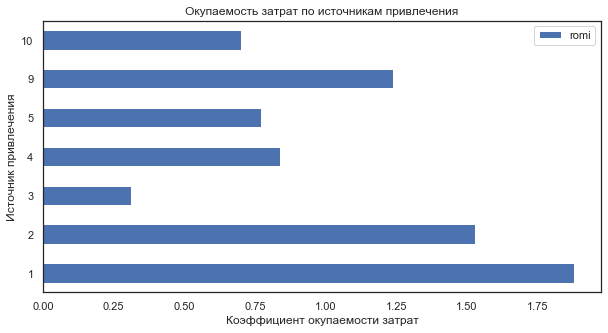

In [100]:
report_source.plot(y='romi', x='source_id', figsize=(10,5), kind='barh');
plt.title('Окупаемость затрат по источникам привлечения');
plt.xlabel('Коэффициент окупаемости затрат');
plt.ylabel('Источник привлечения');
plt.show();

В целом, затраты окупаются у трех источников привлечения - 1,2 и 9. 

Не смотря на то, что 3 источник привлечения был самым дорогим, кампания не прошла. Необходимо нарастить количество покупателей, затратив на их привлечения по 1,2 и 9 источникам привлечения, а также во вторую очередь вытягивать до окупаемости 4, 5 и 10 источники как потенциально успешные.

##### Динамика окупаемости затрат на покупателей по источнику привлечения

In [101]:
display(orders_new.head())
# создадим сгруппированную таблицу с данными о количестве покупателей и сумме прибыли с каждого источника привлечения по месяцам
revenue_source = orders_new.groupby(
    ['buy_month', 'source_id']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index('source_id')
display(revenue_source)


,buy_ts,revenue,uid,buy_date,buy_week,buy_month,buy_year,first_buy_month,source_id,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,22,2017-06-01,2017,2017-06-01,1.0,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,22,2017-06-01,2017,2017-06-01,2.0,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,22,2017-06-01,2017,2017-06-01,3.0,desktop


,source_id,revenue,uid
buy_month,,,
2017-06-01,1.0,1264.199951,202
2017-06-01,2.0,1402.750000,268
2017-06-01,3.0,2430.159912,564
2017-06-01,4.0,2026.589966,415
2017-06-01,5.0,1792.780029,369
...,...,...,...
2018-05-01,3.0,3485.919922,860
2018-05-01,4.0,4049.189941,873
2018-05-01,5.0,2885.340088,583


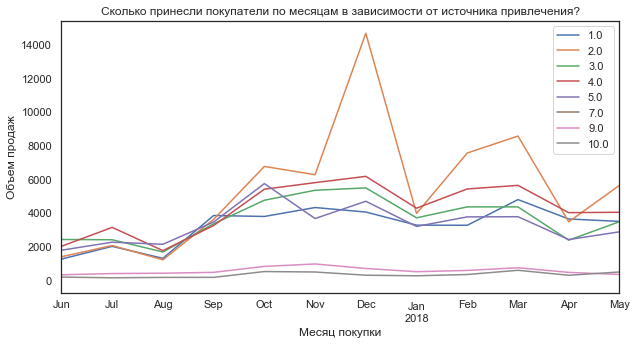

In [102]:
revenue_source.groupby('source_id')['revenue'].plot(figsize=(10,5), legend=True)
plt.title('Сколько принесли покупатели по месяцам в зависимости от источника привлечения?')
plt.xlabel('Месяц покупки')
plt.ylabel('Объем продаж')
plt.show()

На графике сразу выделяется источник 2 с резким увеличением прибыли в декабре и в феврале-марте, в сравнении с другими источниками. Возможно, этот источник наиболее эффективный на данное время. Причем 10 и 9 источник - наиболее неприбыльные, также в прибыльности по этим источникам не прослеживается сезонности спроса.

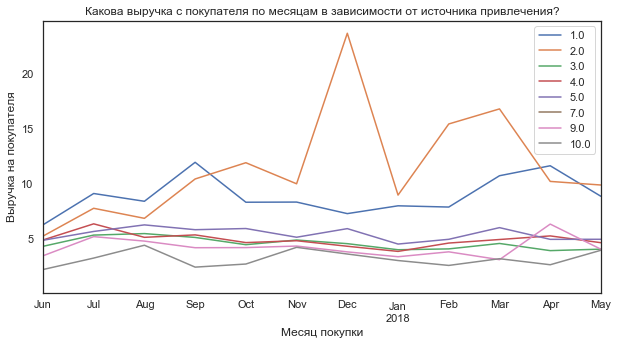

In [103]:
revenue_source['revenue_by_buyer'] = revenue_source['revenue'] / revenue_source['uid']

revenue_source.groupby('source_id')['revenue_by_buyer'].plot(figsize=(10,5), legend=True)
plt.title('Какова выручка с покупателя по месяцам в зависимости от источника привлечения?')
plt.xlabel('Месяц покупки')
plt.ylabel('Выручка на покупателя')
plt.show()

Выручка с покупателя по источникам привлечения по месяцам еще больше проясняет ситуацию с самыми прибыльными источникам: 2 и 1 - те источники, которые вполне возмоджно принесут нам бОльшую прибыль при прочих равных условиях. Однако, это неточно, нужно проверить.



In [104]:
costs_by_source_by_month = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index('source_id').reset_index()
display(costs_by_source_by_month.head())

costs_users = orders_new.groupby(['buy_month', 'source_id'])['uid'].nunique().reset_index('source_id').reset_index()
display(costs_users.head())

# Объединим таблицы с данными о затратах по источникам привлечения, количеству покупателей
costs_by_source_users = pd.merge(
    costs_by_source_by_month, 
    costs_users, 
    left_on=['month', 'source_id'], right_on=['buy_month', 'source_id'])
display(costs_by_source_users.head())


,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


,buy_month,source_id,uid
0,2017-06-01,1.0,202
1,2017-06-01,2.0,268
2,2017-06-01,3.0,564
3,2017-06-01,4.0,415
4,2017-06-01,5.0,369


,month,source_id,costs,buy_month,uid
0,2017-06-01,1,1125.61,2017-06-01,202
1,2017-06-01,2,2427.38,2017-06-01,268
2,2017-06-01,3,7731.65,2017-06-01,564
3,2017-06-01,4,3514.80,2017-06-01,415
4,2017-06-01,5,2616.12,2017-06-01,369


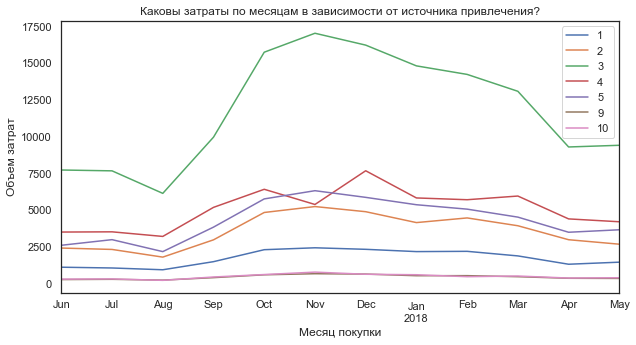

In [105]:
costs_by_source_users = costs_by_source_users.set_index('buy_month')

costs_by_source_users.groupby('source_id')['costs'].plot(figsize=(10,5), legend=True)
plt.title('Каковы затраты по месяцам в зависимости от источника привлечения?')
plt.xlabel('Месяц покупки')
plt.ylabel('Объем затрат')
plt.show()

Как мы уже узнали из предыдущих шагов, 3 источник является самым затратным, при этом не самым прибыльным. Динамика изменения затрат и прибыли с каждого источника подтверждает этот факт.

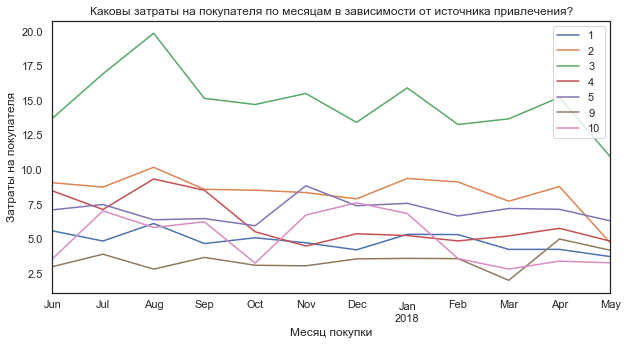

In [106]:
costs_by_source_users['costs_by_buyer'] = costs_by_source_users['costs'] / costs_by_source_users['uid']

costs_by_source_users.groupby('source_id')['costs_by_buyer'].plot(figsize=(10,5), legend=True)
plt.title('Каковы затраты на покупателя по месяцам в зависимости от источника привлечения?')
plt.xlabel('Месяц покупки')
plt.ylabel('Затраты на покупателя')
plt.show()

По затратам на привлеечения одного покупателя источник № 3 также лидирует. Однако необходимо посмотреть динамику окупаемости затрат тоже, данный показатель будет более информативен.

Объединим таблицы для нахождения ROMI в динамике.

In [107]:
revenue_source = revenue_source.reset_index()
display(revenue_source.head())
costs_by_source_users = costs_by_source_users.reset_index()
display(costs_by_source_users.head())

data_source_romi = pd.merge(
    revenue_source[['buy_month', 'source_id', 'revenue', 'revenue_by_buyer']], 
    costs_by_source_users[['buy_month', 'source_id', 'costs', 'costs_by_buyer']], 
    left_on=['buy_month', 'source_id'], right_on=['buy_month', 'source_id'])
display(data_source_romi.head())


,buy_month,source_id,revenue,uid,revenue_by_buyer
0,2017-06-01,1.0,1264.199951,202,6.258416
1,2017-06-01,2.0,1402.750000,268,5.234142
2,2017-06-01,3.0,2430.159912,564,4.308794
3,2017-06-01,4.0,2026.589966,415,4.883349
4,2017-06-01,5.0,1792.780029,369,4.858482


,buy_month,month,source_id,costs,uid,costs_by_buyer
0,2017-06-01,2017-06-01,1,1125.61,202,5.572327
1,2017-06-01,2017-06-01,2,2427.38,268,9.057388
2,2017-06-01,2017-06-01,3,7731.65,564,13.708599
3,2017-06-01,2017-06-01,4,3514.80,415,8.469398
4,2017-06-01,2017-06-01,5,2616.12,369,7.089756


,buy_month,source_id,revenue,revenue_by_buyer,costs,costs_by_buyer
0,2017-06-01,1.0,1264.199951,6.258416,1125.61,5.572327
1,2017-06-01,2.0,1402.750000,5.234142,2427.38,9.057388
2,2017-06-01,3.0,2430.159912,4.308794,7731.65,13.708599
3,2017-06-01,4.0,2026.589966,4.883349,3514.80,8.469398
4,2017-06-01,5.0,1792.780029,4.858482,2616.12,7.089756


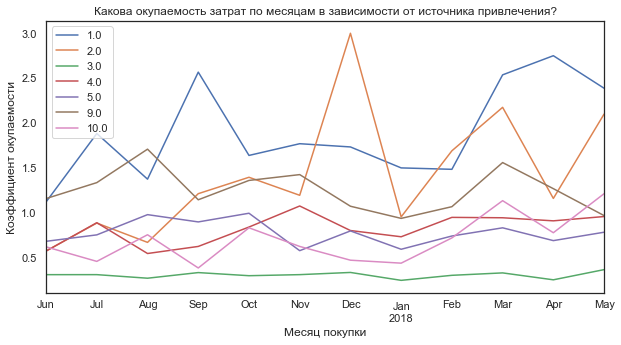

In [108]:
data_source_romi['romi'] = data_source_romi['revenue'] / data_source_romi['costs']
data_source_romi = data_source_romi.set_index('buy_month')

data_source_romi.groupby('source_id')['romi'].plot(figsize=(10,5), legend=True)
plt.title('Какова окупаемость затрат по месяцам в зависимости от источника привлечения?')
plt.xlabel('Месяц покупки')
plt.ylabel('Коэффициент окупаемости')
plt.show()

Мы уже считали окупаемость затрат по источникам затрат ранее, где были три основных источников привлечения, уровень окупаемости которых от 1.28 до 1.85 (9, 2 и 1). Причем 1 источник привлечения - самый прибыльный.

Из графика видно, что эти три источника располагаются гораздо выше остальных. Как ни странно, самый высокий коэффициент окупаемости в декабре показал только 2 источник. Видимо, именно с этого источника пришли все покупатели, сделавших основную прибыль 10 декабря 2017 года.

3 источник показал себя с самой худшей стороны - он практически не окупается и не окупался никогда за весь год.



##### 3. Расчет ROMI по типу устройства

,device,revenue,uid
buy_month,,,
2017-06-01,desktop,8037.270020,1667
2017-06-01,touch,1406.229980,336
2017-07-01,desktop,9785.900391,1545
2017-07-01,touch,2699.360107,419
2017-08-01,desktop,7265.450195,1182


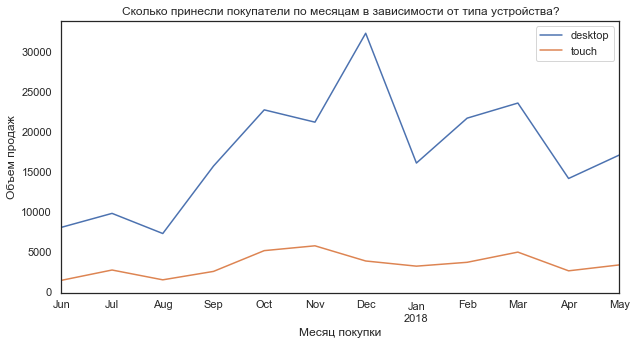

In [109]:
revenue_device = orders_new.groupby(['buy_month', 'device']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index('device')
display(revenue_device.head())

revenue_device.groupby('device')['revenue'].plot(figsize=(10,5), legend=True)
plt.title('Сколько принесли покупатели по месяцам в зависимости от типа устройства?')
plt.xlabel('Месяц покупки')
plt.ylabel('Объем продаж')
plt.show()

Из графика видно, что покупатели, зашедшие через сенсорные устройства, принесли гораздо меньше прибыли и объем продаж гораздо более плавен из месяца в месяц. Скорее всего, какие-то рекламные компания не действуют на данную группу пользователей. При этом у покупателей, зашедших через компьютер, четко прослеживается сезонность объема продаж - низкие показатели летом 2017 года и резкое увеличение в осенне-зимний период, небольшое снижение в январе (у людей нет денег после январьских праздников) и снижение в апреле.

Объединим таблицы с данными о щатратах по месяцам и распределению количества покупателей по типу устройств.

In [110]:
costs_by_month = costs.groupby('month')['costs'].sum()
display(costs_by_month.head())

users_by_device_by_month=orders_new.groupby(['buy_month', 'device'])['uid'].nunique().reset_index('device')
display(users_by_device_by_month.head())
users_by_device_by_month.info()

data_costs_by_device = pd.merge(users_by_device_by_month, costs_by_month, left_index=True, right_index=True)
display(data_costs_by_device.head())
data_costs_by_device.info()



month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costs, dtype: float64

,device,uid
buy_month,,
2017-06-01,desktop,1667
2017-06-01,touch,336
2017-07-01,desktop,1545
2017-07-01,touch,419
2017-08-01,desktop,1182


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2017-06-01 to 2018-05-01
Data columns (total 2 columns):
device    24 non-null object
uid       24 non-null int64
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


,device,uid,costs
2017-06-01,desktop,1667,18015.00
2017-06-01,touch,336,18015.00
2017-07-01,desktop,1545,18240.59
2017-07-01,touch,419,18240.59
2017-08-01,desktop,1182,14790.54


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2017-06-01 to 2018-05-01
Data columns (total 3 columns):
device    24 non-null object
uid       24 non-null int64
costs     24 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 768.0+ bytes


In [111]:
# добавим в таблицу также данные об общем количестве покупателей по каждому типу устройства по месяцам
users_by_month=orders_new.groupby(['buy_month'])['uid'].nunique()
users_by_month.name = 'uid_total'

data_costs_by_device =data_costs_by_device.merge(users_by_month,left_index=True, right_index=True)
display(data_costs_by_device.head())

,device,uid,costs,uid_total
2017-06-01,desktop,1667,18015.00,2023
2017-06-01,touch,336,18015.00,2023
2017-07-01,desktop,1545,18240.59,1984
2017-07-01,touch,419,18240.59,1984
2017-08-01,desktop,1182,14790.54,1472


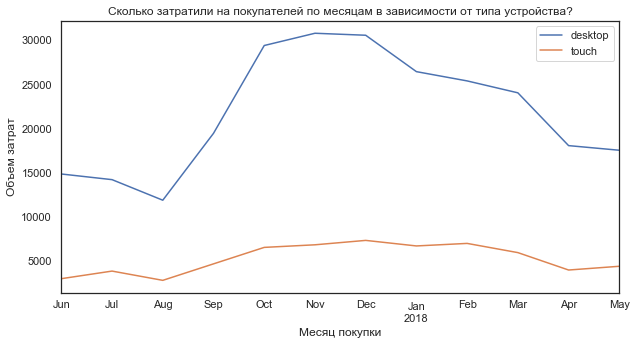

In [112]:
# Найдем затраты на каждое устройство по месяцам
data_costs_by_device['costs_by_device'] = data_costs_by_device['costs'] / data_costs_by_device[
    'uid_total'] * data_costs_by_device['uid']

data_costs_by_device.groupby('device')['costs_by_device'].plot(figsize=(10,5), legend=True)
plt.title('Сколько затратили на покупателей по месяцам в зависимости от типа устройства?')
plt.xlabel('Месяц покупки')
plt.ylabel('Объем затрат')
plt.show()

График затрат по месяцам по типу устройства схож с графиком объема продаж по месяцам. В осенне-зимние месяца тратили больше, чем в другие месяцы. Яственно заметно снижение затрат в августе. Может быть, при повышении затрат в этом месяце, приходили бы больше покупателей. Не все уезжают.

Text(0, 0.5, 'Выручка на покупателя')

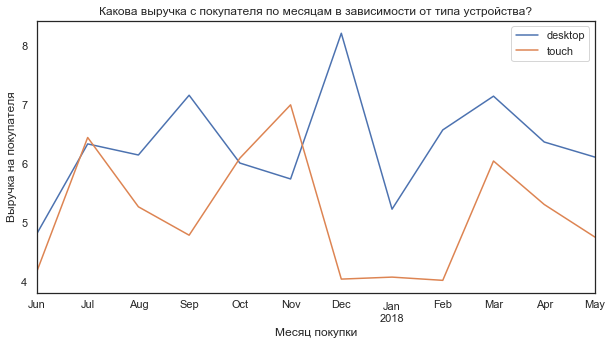

In [113]:
revenue_device['revenue_by_buyer'] = revenue_device['revenue'] / revenue_device['uid']

revenue_device.groupby('device')['revenue_by_buyer'].plot(figsize=(10,5), legend=True)
plt.title('Какова выручка с покупателя по месяцам в зависимости от типа устройства?')
plt.xlabel('Месяц покупки')
plt.ylabel('Выручка на покупателя')

Выручка с каждого пользователя по типу устройств отличается из месяц в месяц. Причем в декабре у покупателей, зашедших через сенсорные устройства, наблюдается самый низкий показатель выручки. Это странно, учитывая разницу с выручкой покупателей с компьютеров. Скорее всего, какие-то источники привлечения не работают на сенсорных устройствах.

Объединим таблицы с затратами и выручкой с покупателей по типу устройства для нахождения уровня окупаемости затрат.

In [114]:
data_costs_by_device['costs_by_buyer'] = data_costs_by_device['costs_by_device'] / data_costs_by_device['uid']
data_costs_by_device = data_costs_by_device.reset_index()
display(data_costs_by_device.head())

revenue_device = revenue_device.reset_index()
display(revenue_device.head())

report_devices = pd.merge(
    data_costs_by_device[['index', 'device', 'costs_by_device', 'costs_by_buyer']], 
    revenue_device[['buy_month', 'device', 'revenue', 'revenue_by_buyer']], 
    left_on=['index', 'device'], right_on=['buy_month', 'device'])
display(report_devices.head())

,index,device,uid,costs,uid_total,costs_by_device,costs_by_buyer
0,2017-06-01,desktop,1667,18015.00,2023,14844.787444,8.905091
1,2017-06-01,touch,336,18015.00,2023,2992.110727,8.905091
2,2017-07-01,desktop,1545,18240.59,1984,14204.491709,9.193846
3,2017-07-01,touch,419,18240.59,1984,3852.221376,9.193846
4,2017-08-01,desktop,1182,14790.54,1472,11876.642853,10.047921


,buy_month,device,revenue,uid,revenue_by_buyer
0,2017-06-01,desktop,8037.270020,1667,4.821398
1,2017-06-01,touch,1406.229980,336,4.185208
2,2017-07-01,desktop,9785.900391,1545,6.333916
3,2017-07-01,touch,2699.360107,419,6.442387
4,2017-08-01,desktop,7265.450195,1182,6.146743


,index,device,costs_by_device,costs_by_buyer,buy_month,revenue,revenue_by_buyer
0,2017-06-01,desktop,14844.787444,8.905091,2017-06-01,8037.270020,4.821398
1,2017-06-01,touch,2992.110727,8.905091,2017-06-01,1406.229980,4.185208
2,2017-07-01,desktop,14204.491709,9.193846,2017-07-01,9785.900391,6.333916
3,2017-07-01,touch,3852.221376,9.193846,2017-07-01,2699.360107,6.442387
4,2017-08-01,desktop,11876.642853,10.047921,2017-08-01,7265.450195,6.146743


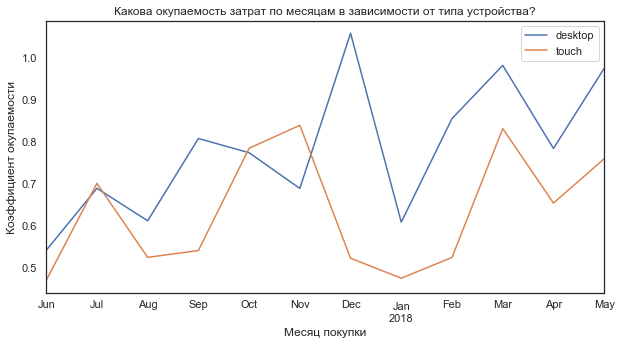

In [115]:
report_devices['romi'] = report_devices['revenue'] / report_devices['costs_by_device']
report_devices = report_devices.set_index('buy_month')

report_devices.groupby('device')['romi'].plot(figsize=(10,5), legend=True)
plt.title('Какова окупаемость затрат по месяцам в зависимости от типа устройства?')
plt.xlabel('Месяц покупки')
plt.ylabel('Коэффициент окупаемости')
plt.show()

В целом, уровень окупаемости затрат на покупателей с компьютеров выше, чем с сенсорных устройств. Однако, в какие то месяца уровень окупаемости был примерно на одном уровне или чуть ниже. Рассмотрим общий коэффициент окупаемости за весь год по типу устройств.

In [116]:
total_romi_device = report_devices.groupby('device').agg({'revenue': 'sum', 'costs_by_device': 'sum'})
total_romi_device['total_romi'] = total_romi_device['revenue'] / total_romi_device['costs_by_device']
display(total_romi_device)

,revenue,costs_by_device,total_romi
device,,,
desktop,209670.234375,262546.702863,0.798602
touch,40503.710938,63002.133559,0.642894


Что же, затраты не окупились. Видимо, не зря, затраты относят к источникам привлечения, а не к типу устройств. Скорее всего, тип устройства может быть вспомогательным фактором при принятии решении об эффективности маркетинговых кампаний. Тем не менее, следуюет учитывать, что основная масса людей сейчас покупает все через смартфоны. Это быстро и удобно. Необходимо оценить удобство интерфейса для мобильных устройств.

## <a id="step3">Шаг 3. Выводы </a>

* Какие источники/платформы вы бы порекомендовали? 
* Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?

Для увеличения прибыльности сервиса Яндекс.Афиша необходимо сделать основном упор на следующие источники привлечения: 1, 2 и 9. 

Причем 2 источник себя зарекомендовал больше, так как именно с него пришла основная масса покупателей в декабре 2017 года (анализ динамики изменения ROMI по месяцам и источнику привлечения), сделавших месяц самым прибыльным. Источник 9 хорошо показал себя в апреле 2018 года, где показывал бОльший коэффициент окупаемости среди источников (не смотря на общее снижение прибыльности в данный период). Источник 1 - самый высокий показатель ROMI в августе, наиболее непопулярный месяц для посещения и покупок, необходимо также проанализировать причины и сделать упор на него в такие месяцы.

Также стоит пересмотреть маркетинговую кампанию с источника 3, как наиболеее затратного и наименее эффективного (во всех метриках показывал свою неэффективность).

Другие источники в динамике показывали разную окупаемость, стоит рассмотреть месяцы с наиболее высоким коэффициентом окупаемости и проанализировать, возможно в какие-то месяцы больше сконцентрироваться на этих источниках, не смотря на суммарный ROMI менее 1.

Что касается платформ - ни одна из платформ не показала полной окупаемости. Возможно, дело в неэффективности многих источников привлечения. Кроме того, даже в осенне-зимний период, в период повышенного спроса и высокой прибыльности, покупатели с сенсорных типов устройств не показывают резкой активности. Также, данная группа покупателей гораздо реже делает заказ в день первого посещения сайта. Есть предположения, что на привлечение данной группы зайдествованы не очень эффективные источники, а также процесс поиска или оформления билетов не так удобен, как с компьютера. Необходимо проанализировать причины и повысить юзабилити версии для мобильных устройств.